In [4]:
%config InlineBackend.figure_format = 'retina'
import sys, os
import numpy as np
sys.path.insert(0, os.path.realpath(os.path.join(os.getcwd(), '..')))
from getdist import plots, loadMCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
%matplotlib inline

#-------self biuld function----------#
from function import load_covariance_matrices

GetDist Version: 1.6.4, Matplotlib version: 3.10.3


#### show all parameters from cocoa's one time evaluation, 
#### using fiducial value from 1706.09359 page 21

In [10]:
Name = ['weight', 'minuslogpost', 'As_1e9', 'ns', 'H0', 'omegab', 'omegam', 'mnu', 'w0pwa', 'w', 'DES_DZ_S1', 'DES_DZ_S2', 'DES_DZ_S3', 'DES_DZ_S4', 'DES_M1', 'DES_M2', 'DES_M3', 'DES_M4', 'DES_A1_1', 'DES_A1_2', 'DES_DZ_L1', 'DES_DZ_L2', 'DES_DZ_L3', 'DES_DZ_L4', 'DES_DZ_L5', 'DES_B1_1', 'DES_B1_2', 'DES_B1_3', 'DES_B1_4', 'DES_B1_5', 'As', 'wa', 'omegabh2', 'omegach2', 'omegal', 'omegamh2', 'sigma8', 's8h5', 's8omegamp5', 's8omegamp25', 'age', 'rdrag', 'yheused', 'omegan2', 'omegan', 'minuslogprior', 'minuslogprior__0','chi2', 'chi2__des_y3.des_3x2pt' ]
Param = np.loadtxt('./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt.1.txt',)

for i in range(len(Name)):
    print(Name[i], Param[i])

weight 1.0
minuslogpost 736.43683
As_1e9 2.26
ns 0.968
H0 68.81
omegab 0.044
omegam 0.295
mnu 0.06
w0pwa -1.0
w -1.0
DES_DZ_S1 0.0
DES_DZ_S2 -0.014
DES_DZ_S3 0.014
DES_DZ_S4 -0.033
DES_M1 0.013
DES_M2 0.013
DES_M3 0.013
DES_M4 0.013
DES_A1_1 0.0
DES_A1_2 0.0
DES_DZ_L1 0.002
DES_DZ_L2 -0.001
DES_DZ_L3 0.003
DES_DZ_L4 -0.0
DES_DZ_L5 -0.0
DES_B1_1 1.45
DES_B1_2 1.55
DES_B1_3 1.65
DES_B1_4 1.8
DES_B1_5 2.0
As 2.26e-09
wa 0.0
omegabh2 0.020833191
omegach2 0.11819875
omegal 0.70492425
omegamh2 0.13967707
sigma8 0.84892334
s8h5 1.0233936
s8omegamp5 0.46108339
s8omegamp25 0.62563924
age 13.759035
rdrag 149.32243
yheused 0.24519446
omegan2 0.00064486657
omegan 0.0013619675
minuslogprior -32.456241
minuslogprior__0 -32.456241
chi2 1537.7861
chi2__des_y3.des_3x2pt 1537.7861


#### I tried mcmc to find best-fit parameters, but not work well

In [2]:
samples  = loadMCSamples('./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_mcmc', settings = {'ignore_rows':0.3})
#samples2 = loadMCSamples('./chain_desy3_and_kids1000_hybrid_analysis.txt', settings = {'ignore_rows':0.3})
raw_samples = samples.samples
logpost = samples.weights * samples.loglikes
max_idx = np.argmax(logpost)
best_fit_params = raw_samples[max_idx]

param_names = samples.getParamNames().names


print('The best fit point from chain:')
for name, val in zip(param_names, best_fit_params):
    print(f"{name.name}: {val}")

./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_mcmc.1.txt
./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_mcmc.2.txt
./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_mcmc.3.txt
./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_mcmc.4.txt
Removed 0.3 as burn in
The best fit point from chain:
As_1e9: 2.0970229
ns: 1.0459102
H0: 85.236645
omegab: 0.067650577
omegam: 0.28598578
w0pwa: -1.1047338
w: -0.75869173
DES_DZ_S1: 0.003804444
DES_DZ_S2: -0.011069364
DES_DZ_S3: -0.0071681707
DES_DZ_S4: -0.0019692003
DES_M1: -0.0053524535
DES_M2: -0.012835133
DES_M3: -0.022086139
DES_M4: -0.035746162
DES_A1_1: 0.48596458
DES_A1_2: 4.2503963
DES_DZ_L1: 0.0067932092
DES_DZ_L2: -0.0029827395
DES_DZ_L3: 0.001715484
DES_DZ_L4: -0.0069333573
DES_DZ_L5: -0.01279707
DES_B1_1: 1.436725
DES_B1_2: 1.6072009
DES_B1_3: 1.5779736
DES_B1_4: 2.0082655
DES_B1_5: 2.000042
As: 2.0970229e-09
wa: -0.34604207
omegabh2: 0.049150076
omegach2: 0.15798162
omegal: 0.71396486
omegamh2: 0.20777683
sigma8: 0.85700879
s8h5: 0

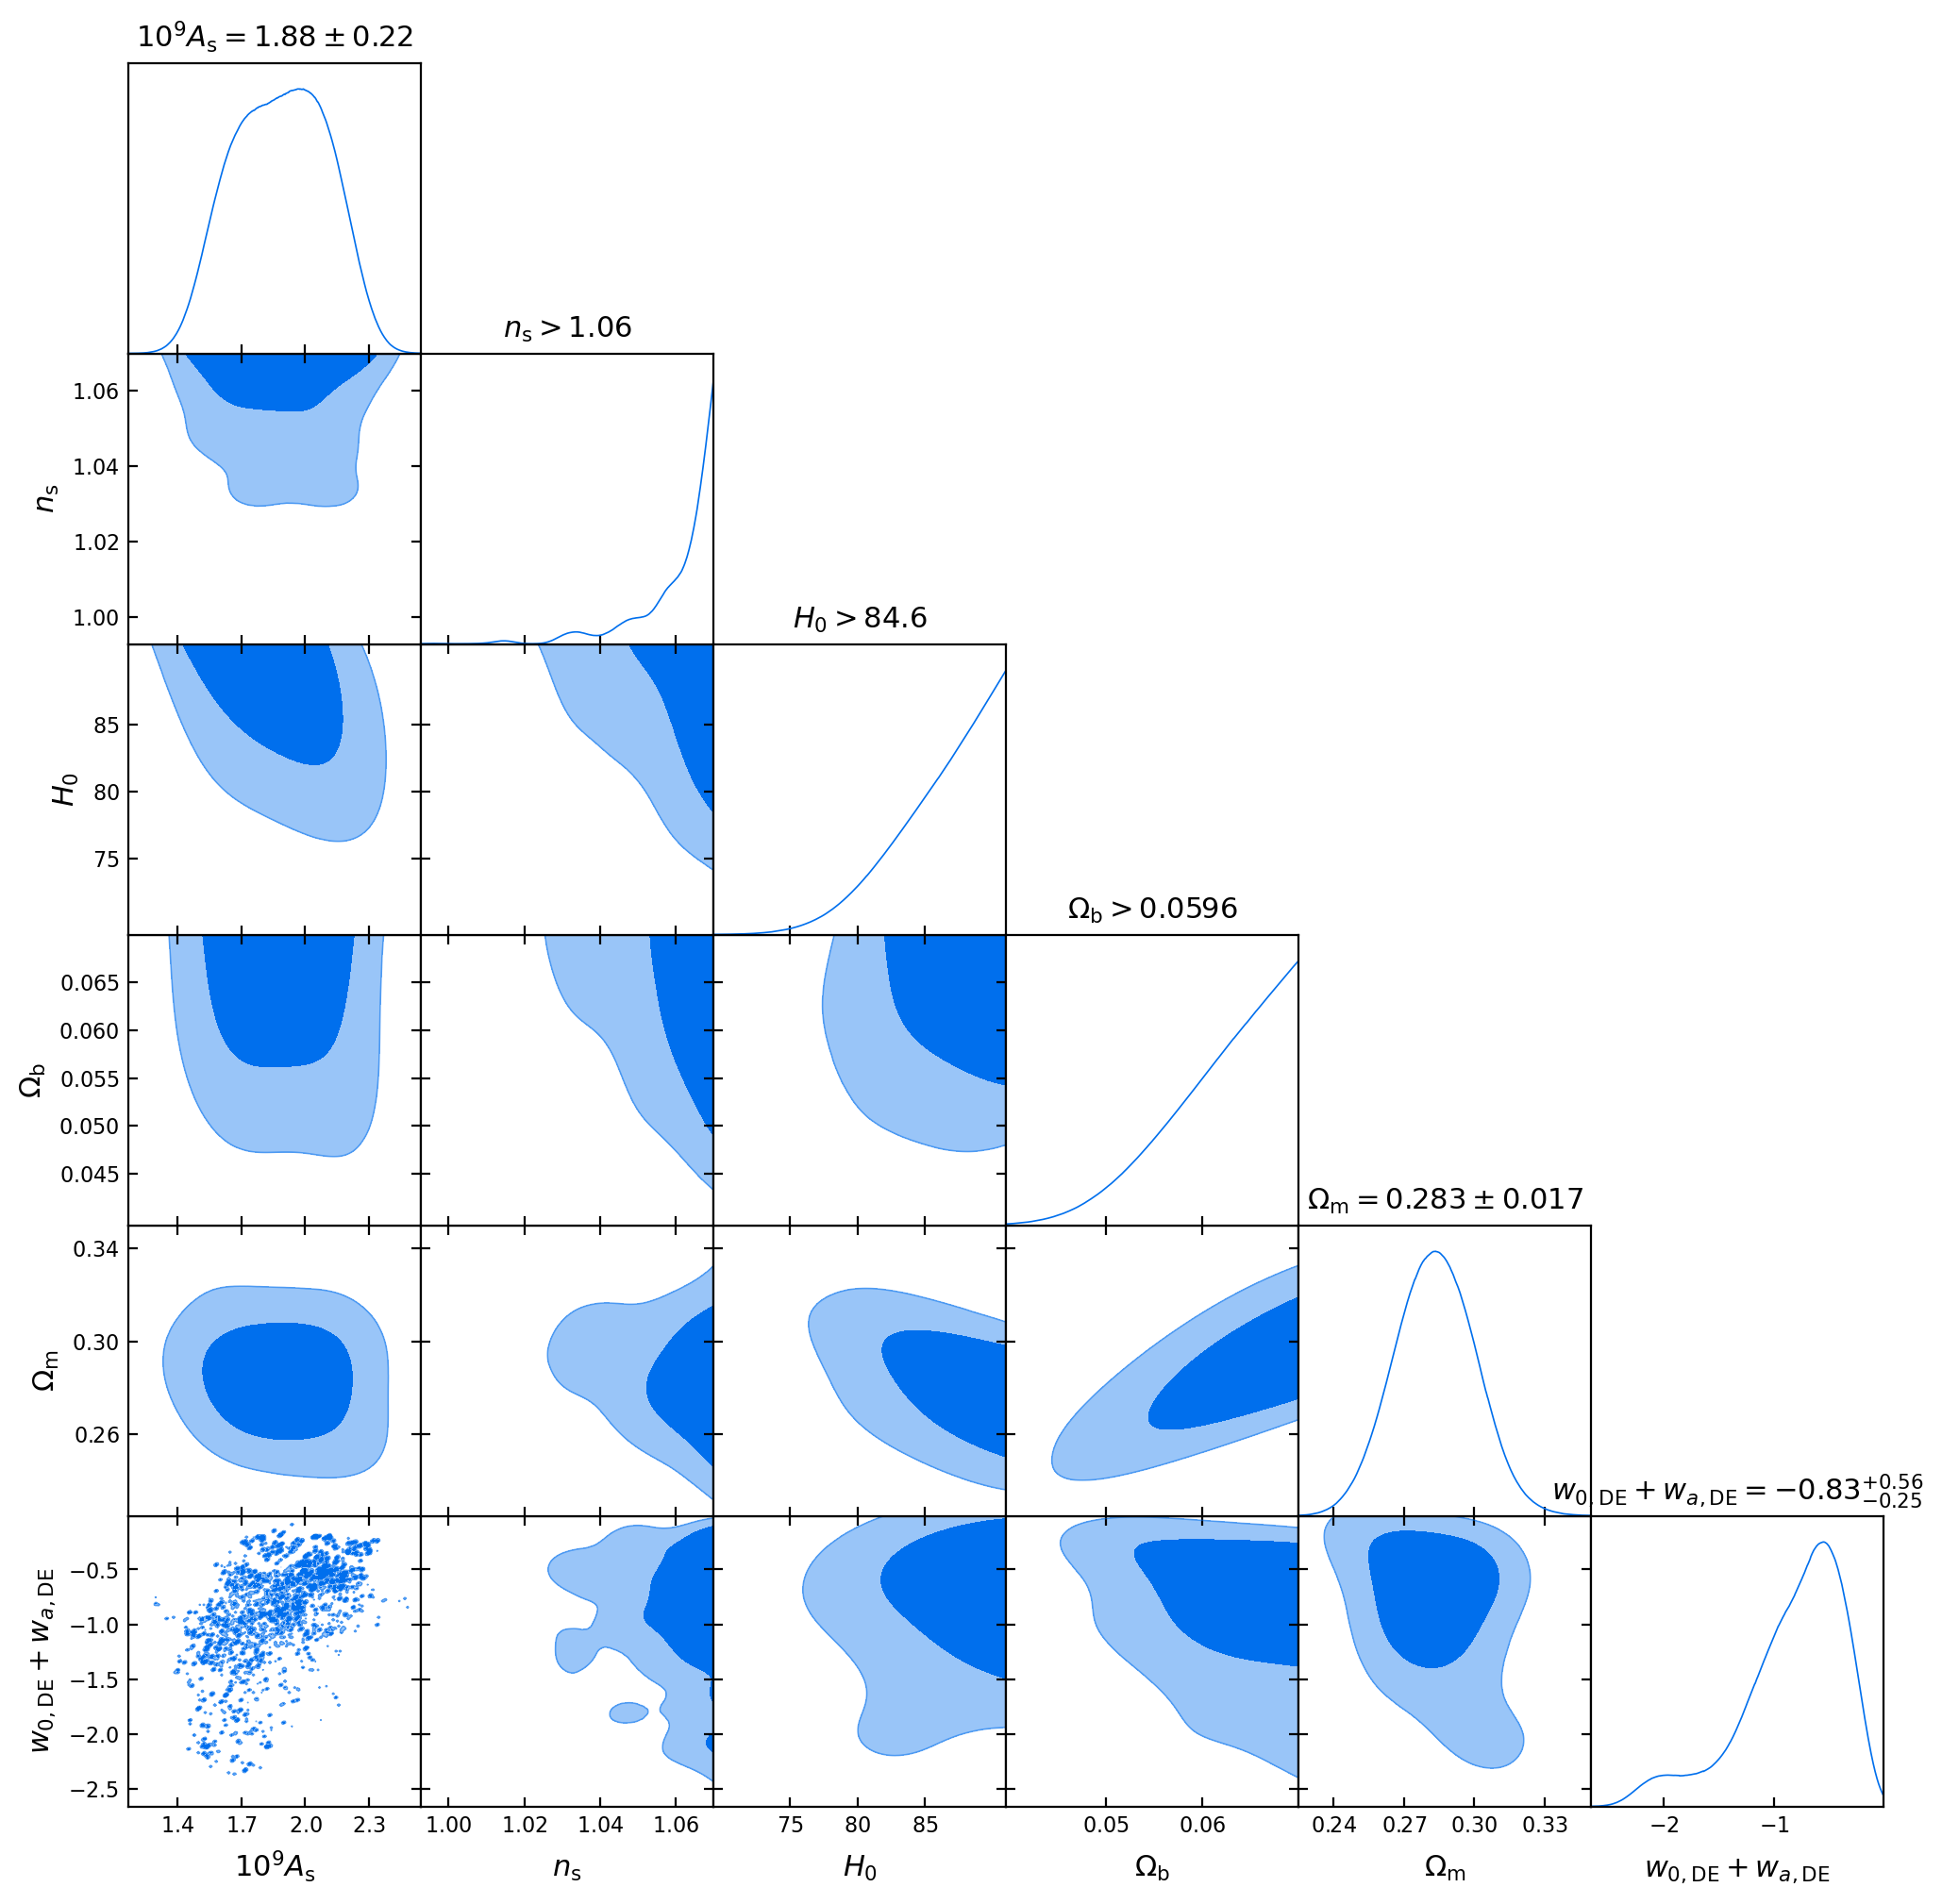

In [3]:
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize=14
g.triangle_plot(samples, params = [samples.getParamNames().names[i] for i in range(6)], filled=True, title_limit=1)

#### so I just use the same set of fiducial parameters for cocoa and firecrown-cosmosis, get datavectors and compare

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations_with_replacement, product
from matplotlib import ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_observable(observable_name,
                    flat_data,
                    obs_flat_data,
                    cov_data,
                    shape,
                    ntomo_srcs,
                    ntomo_lens,
                    n_theta,
                    theta_min,
                    theta_max,
                    mask=None,
                    savefile=None):
    """
    Simplified plotting function for different tomographic layouts.

    Parameters:
    - observable_name: Name of the observable (string).
    - flat_data      : 1D array of model values.
    - obs_flat_data  : 1D array of observational values.
    - cov_data       : 2D covariance matrix matching flat_data length.
    - shape          : "triangle", "rectangle", or "strip".
    - ntomo_srcs     : Number of source tomographic bins.
    - ntomo_lens     : Number of lens tomographic bins.
    - n_theta        : Number of θ points per bin/pair.
    - theta_min, theta_max: Range for θ in arcminutes.
    - mask           : 1D boolean or 0/1 array of length equal to flat_data; points with mask==0 are skipped.
    - savefile       : If provided, save figure; otherwise show.
    """
    Tex = {"xi+": r"\xi+",
           "xi-": r"\xi-",
           "gxgamma": r"\gamma t",
           "gxg": r"{W(\theta)}"}

    # Build bin-pair list
    if shape == "triangle":
        zbin_pairs = [(i, j) for i in range(ntomo_srcs) for j in range(i + 1)]
        nrows, ncols = ntomo_srcs, ntomo_srcs
    elif shape == "rectangle":
        zbin_pairs = list(product(range(ntomo_lens), range(ntomo_srcs)))
        nrows, ncols = ntomo_lens, ntomo_srcs
    elif shape == "strip":
        zbin_pairs = [(i,) for i in range(ntomo_lens)]
        nrows, ncols = 1, ntomo_lens
    else:
        raise ValueError(f"Unknown shape='{shape}'. Must be 'triangle','rectangle','strip'.")

    # Theta grid
    theta = np.logspace(np.log10(theta_min), np.log10(theta_max), n_theta)

    # Figure setup
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(4 * ncols, 4 * nrows),
                             sharex=True, sharey=True,
                             constrained_layout=False,
                             gridspec_kw={'hspace':0.2})
    fig.subplots_adjust(bottom=0.05, top=0.92)
    if nrows == 1:
        axes = axes[np.newaxis, :]

    #------------------------------Loop over bin pairs-----------------------------------------
    for idx, pair in enumerate(zbin_pairs):
        start = idx * n_theta
        end = start + n_theta
        y_model = flat_data[start:end]
        y_obs = obs_flat_data[start:end]
        cov_segment = cov_data[start:end, start:end]
        err = np.sqrt(np.diag(cov_segment))

        # Segment mask slicing
        if mask is not None:
            mask_full = np.array(mask, dtype=bool)
            mask_seg = mask_full[start:end]
        else:
            mask_seg = np.ones(n_theta, dtype=bool)

        theta_plot = theta[mask_seg]
        y_obs_plot = y_obs[mask_seg]
        y_model_plot = y_model[mask_seg]
        err_plot = err[mask_seg]

        # Select axis
        if shape == "triangle":
            i, j = pair
            if i < j:
                axes[i, j].axis("off")
                continue
            ax = axes[i, j]
        elif shape == "rectangle":
            ln, src = pair
            ax = axes[ln, src]
        else:  # strip
            i = pair[0]
            ax = axes[0, i]

        #--------------------------------------Plot Data and Theory---------------------------------------
        ax.plot(theta_plot, y_obs_plot, '-k', label='Data')
        ax.errorbar(theta_plot, y_model_plot, yerr=err_plot,
                    fmt='o', label='Theory',
                    capsize=2, markersize=4, elinewidth=0.8)
        ax.legend(loc='best', fontsize=6, frameon=False)
        ax.set_xlim(theta_min, theta_max)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.yaxis.set_major_formatter(
            ticker.LogFormatterSciNotation(base=10, labelOnlyBase=False)
        )
        ax.grid(True, which='both', ls='--', lw=0.3)
        
        #------------------------------------Residual inset---------------------------------------------
        resid = (y_model - y_obs)
        resid_plot = resid[mask_seg]/err_plot
        ax_res = inset_axes(ax,
                            width="100%", height="15%",
                            loc='lower center',
                            bbox_to_anchor=(0, -0.16, 1, 1),
                            bbox_transform=ax.transAxes)
        ax_res.axhline(y=0, color='k', linestyle='-')
        ax_res.errorbar(theta_plot, resid_plot, yerr=err_plot/err_plot,
                        fmt='.', capsize=2, markersize=3, elinewidth=0.6)
        ax_res.set_xlim(theta_min, theta_max)
        ax_res.set_xscale("log")
        ax_res.yaxis.set_major_formatter(
            ticker.LogFormatterSciNotation(base=10, labelOnlyBase=False)
        )

        #--------------------------------Labels and annotation-------------------------------------------
        if shape == "triangle":
            ax.set_xticklabels([])
            i,j = pair
            if j == 0:
                ax.set_ylabel(fr"${Tex[observable_name]}$")
                ax_res.set_ylabel(fr"$\Delta {Tex[observable_name]}/\sigma_{{{Tex[observable_name]}}}$",fontsize=10)
                ax_res.tick_params(axis='y', labelsize=6)
            if i<ntomo_srcs-1:
                ax_res.set_xticklabels([])
                
            ax.text(0.05, 0.95, f"({i},{j})", transform=ax.transAxes,
                    ha='left', va='top', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.6))
            if i == ntomo_srcs-1:
                ax_res.set_xlabel(r"$\theta$ [arcmin]")
                
        elif shape == "rectangle":
            ln, src = pair
            if src == 0:
                ax.set_ylabel(fr"${Tex[observable_name]}$")
            ax.text(0.05, 0.95, f"({src},{ln})", transform=ax.transAxes,
                    ha='left', va='top', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.6))
            ax.set_xticklabels([])
            if ln < ntomo_lens - 1:
                ax_res.set_xticklabels([])
            if ln == ntomo_lens - 1:
                ax_res.set_xlabel(r"$\theta$ [arcmin]")
        else:  # strip
            i = pair[0]
            if i == 0:
                ax.set_ylabel(fr"${Tex[observable_name]}$")
            ax.set_xticklabels([])
            ax.text(0.05, 0.95, f"({i})", transform=ax.transAxes,
                    ha='left', va='top', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.6))
            ax_res.set_xlabel(r"$\theta$ [arcmin]")

    
    #-------------------Hide lower-tri for triangle-------------------------------
    if shape == "triangle":
        for ii in range(ntomo_srcs):
            for jj in range(ntomo_srcs):
                if ii > jj:
                    axes[jj, ii].axis("off")

    #--------------------------Save or show---------------------------------------------
    if savefile:
        fig.savefig(savefile, dpi=150, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()


def plot_all_observables(datavector,
                         obs_datavector,
                         Cov,
                         ntomo_srcs,
                         ntomo_lens,
                         n_theta,
                         theta_min,
                         theta_max,
                         msk=None,
                         save=False):
    """
    Main function: splits concatenated datavector into segments for xi+, xi-, gammat, Wtheta
    and plots each with updated source/lens bins.

    - xi+, xi-: (ntomo_srcs*(ntomo_srcs+1)//2) * n_theta points, shape="triangle"
    - gammat : (ntomo_srcs*ntomo_lens) * n_theta points, shape="rectangle"
    - Wtheta : ntomo_lens * n_theta points, shape="strip"

    Parameters:
    - msk: 1D boolean or 0/1 array of length equal to total data points; points with msk==0 are skipped.
    """
    # Compute segment lengths
    n_pairs_tri = ntomo_srcs * (ntomo_srcs + 1) // 2
    len_tri = n_pairs_tri * n_theta
    len_rect = ntomo_srcs * ntomo_lens * n_theta
    len_strip = ntomo_lens * n_theta

    lengths = [len_tri, len_tri, len_rect, len_strip]
    shapes  = ["triangle", "triangle", "rectangle", "strip"]
    names   = ["xi+", "xi-", "gxgamma", "gxg"]

    start = 0
    for name, shape, seg_len in zip(names, shapes, lengths):
        flat = datavector[start : start + seg_len]
        obsf = obs_datavector[start : start + seg_len]
        cov = Cov[start : start + seg_len, start : start + seg_len]
        mask_seg_full = None
        if msk is not None:
            mask_seg_full = msk[start : start + seg_len]

        fname = None
        if save:
            ext = {'triangle':'_triangle', 'rectangle':'_rectangle', 'strip':'_strip'}[shape]
            fname = f"{name}{ext}.png"

        plot_observable(
            observable_name=name,
            flat_data=flat,
            obs_flat_data=obsf,
            cov_data=cov,
            shape=shape,
            ntomo_srcs=ntomo_srcs,
            ntomo_lens=ntomo_lens,
            n_theta=n_theta,
            theta_min=theta_min,
            theta_max=theta_max,
            mask=mask_seg_full,
            savefile=fname
        )
        start += seg_len


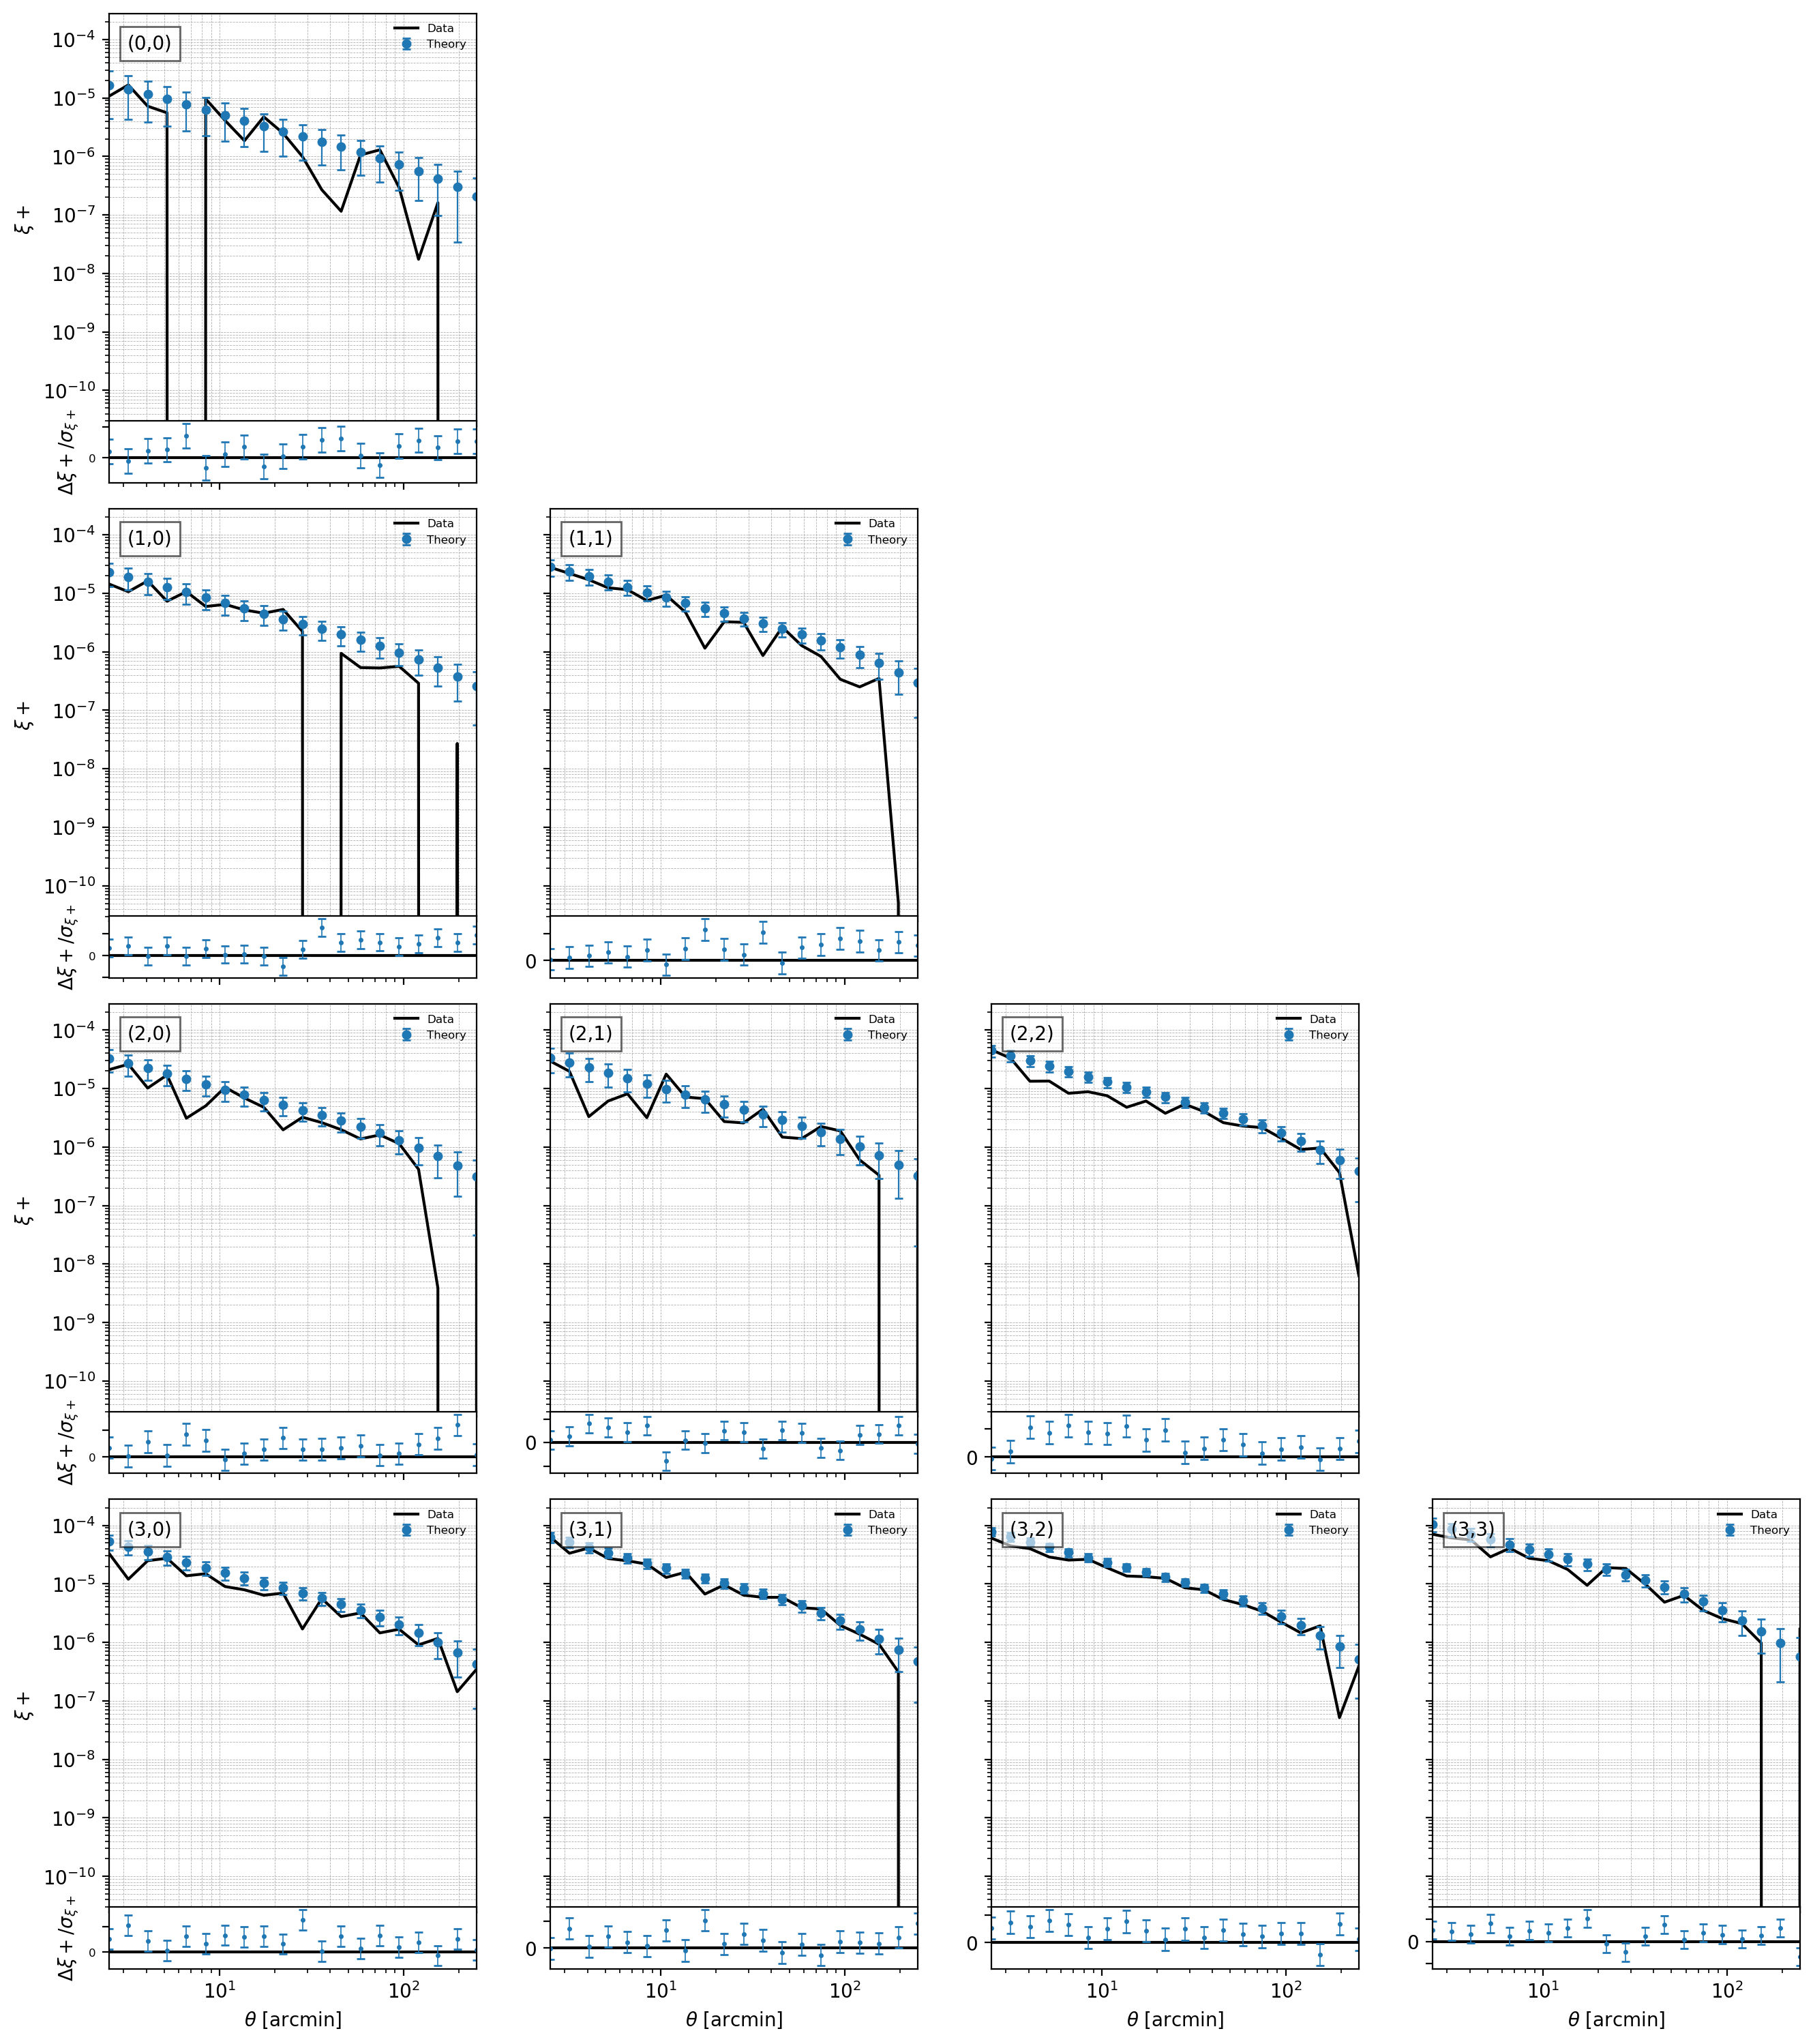

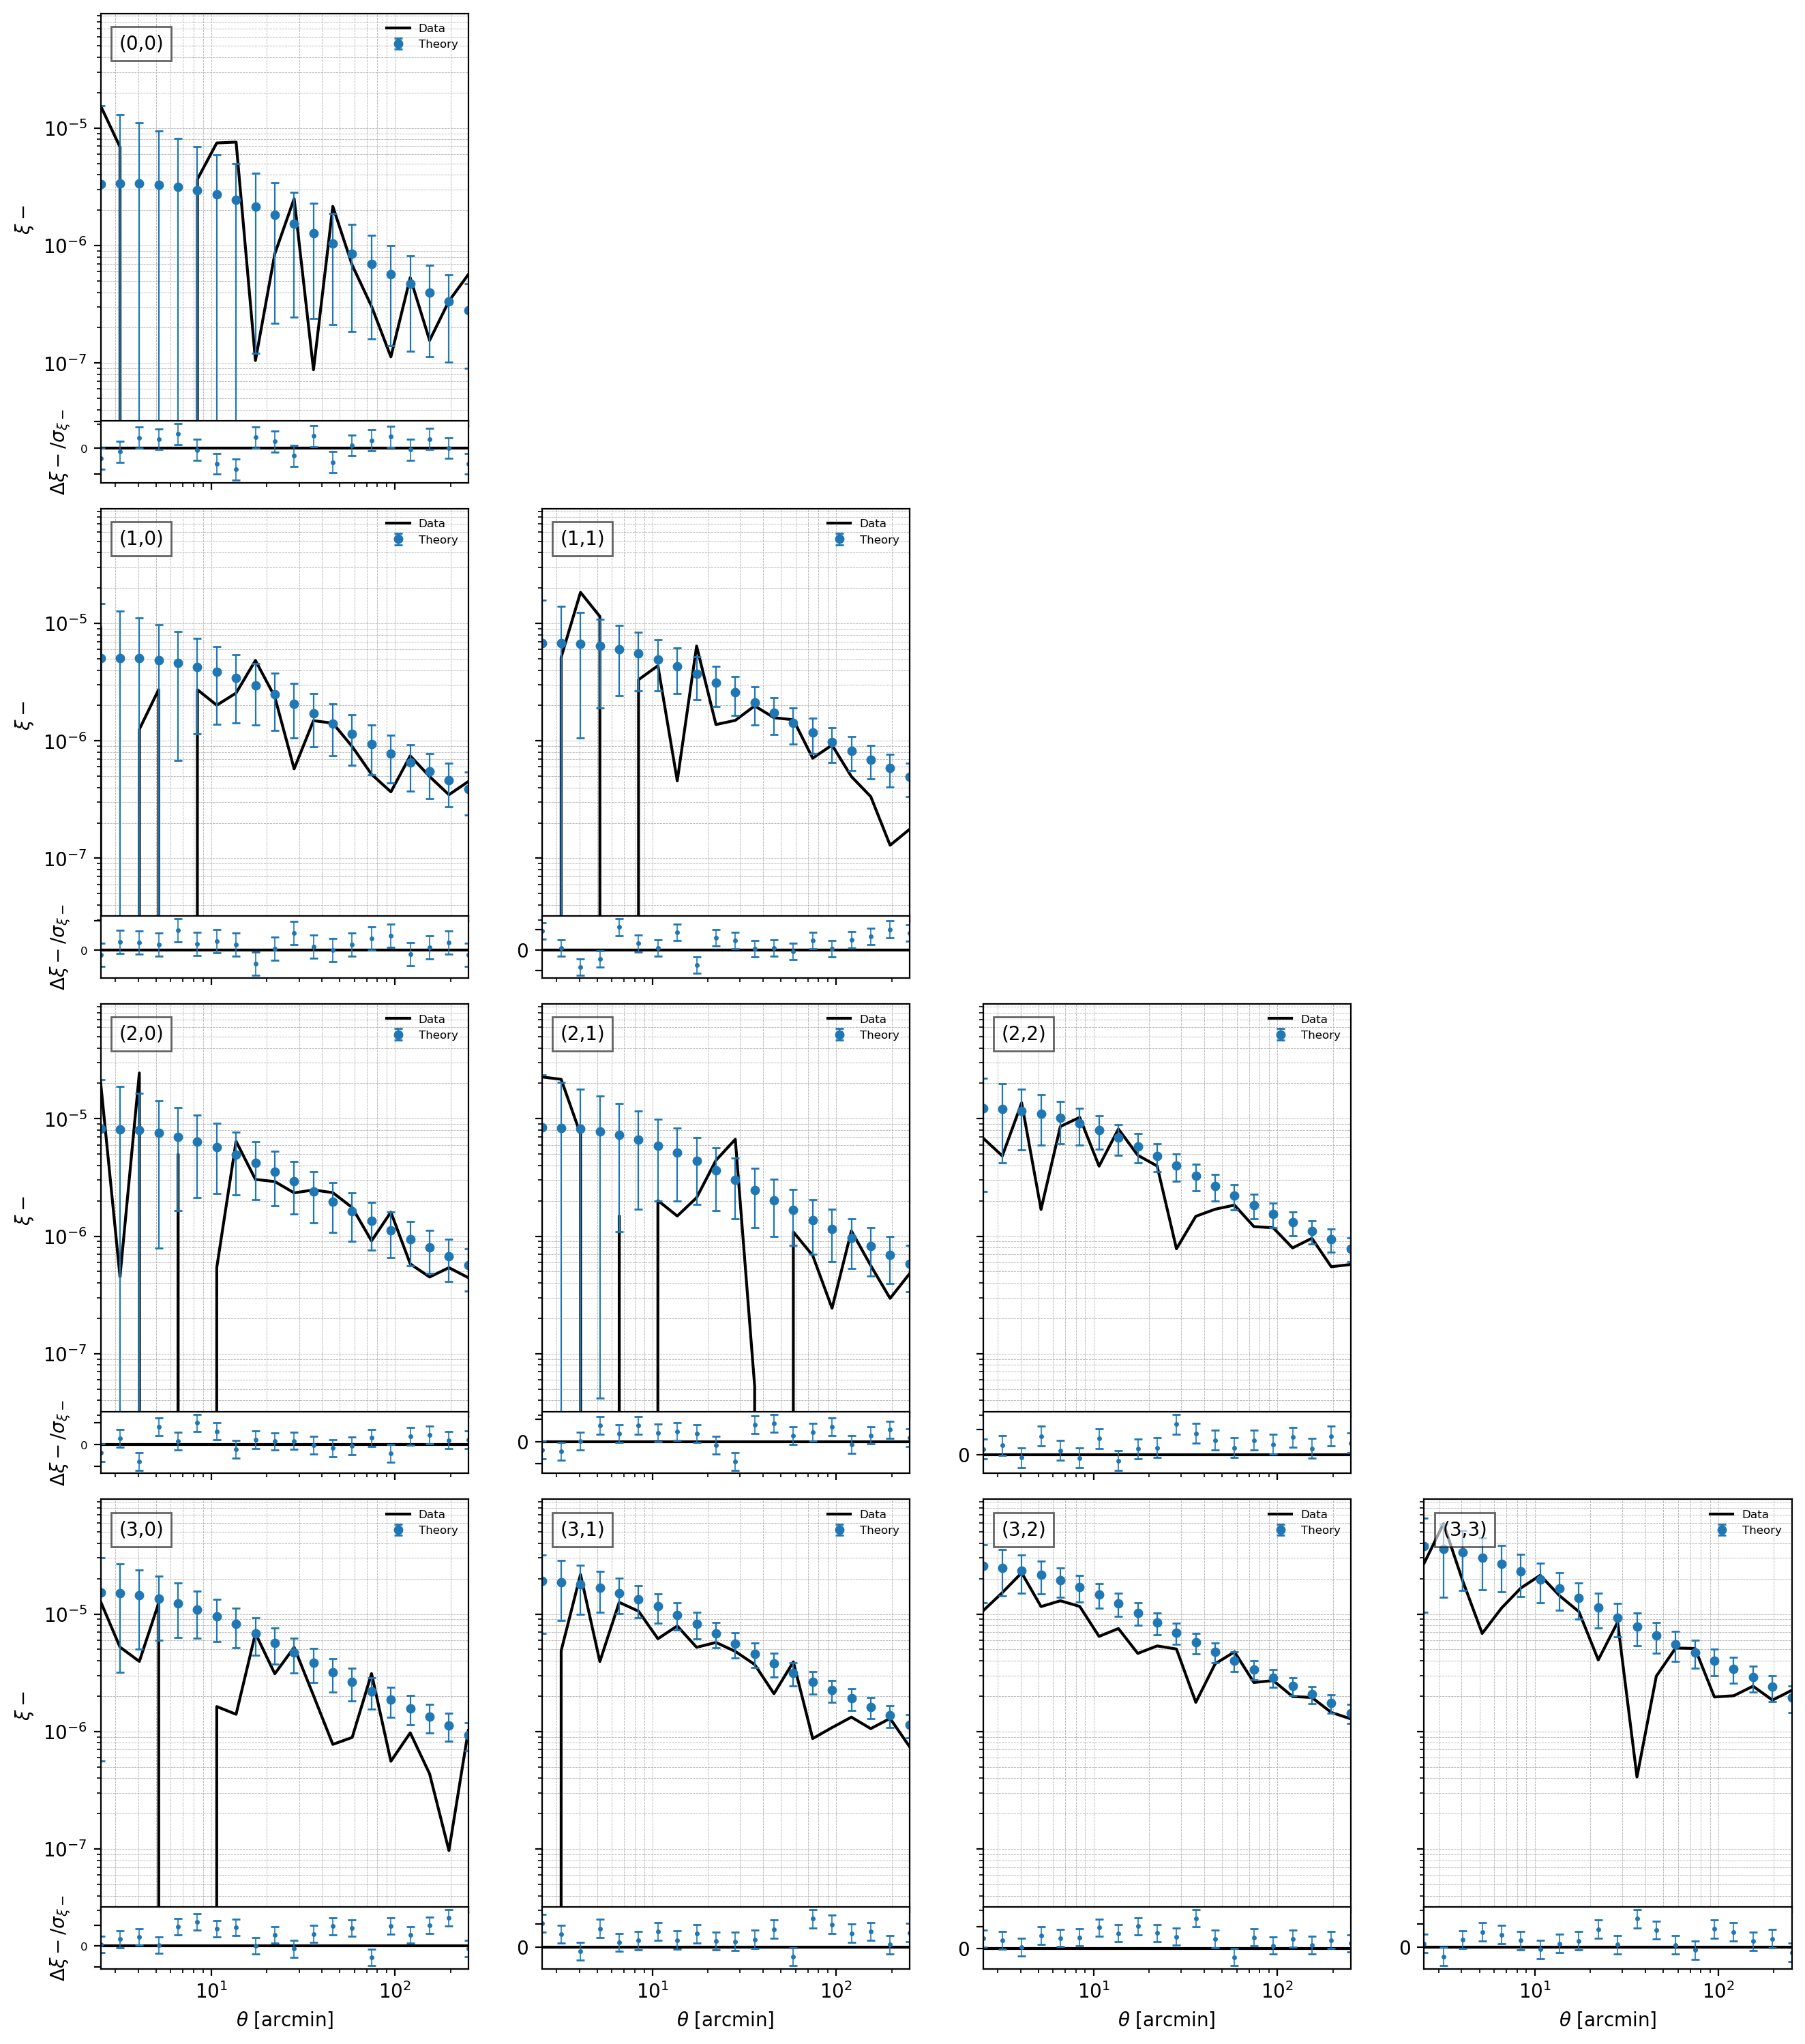

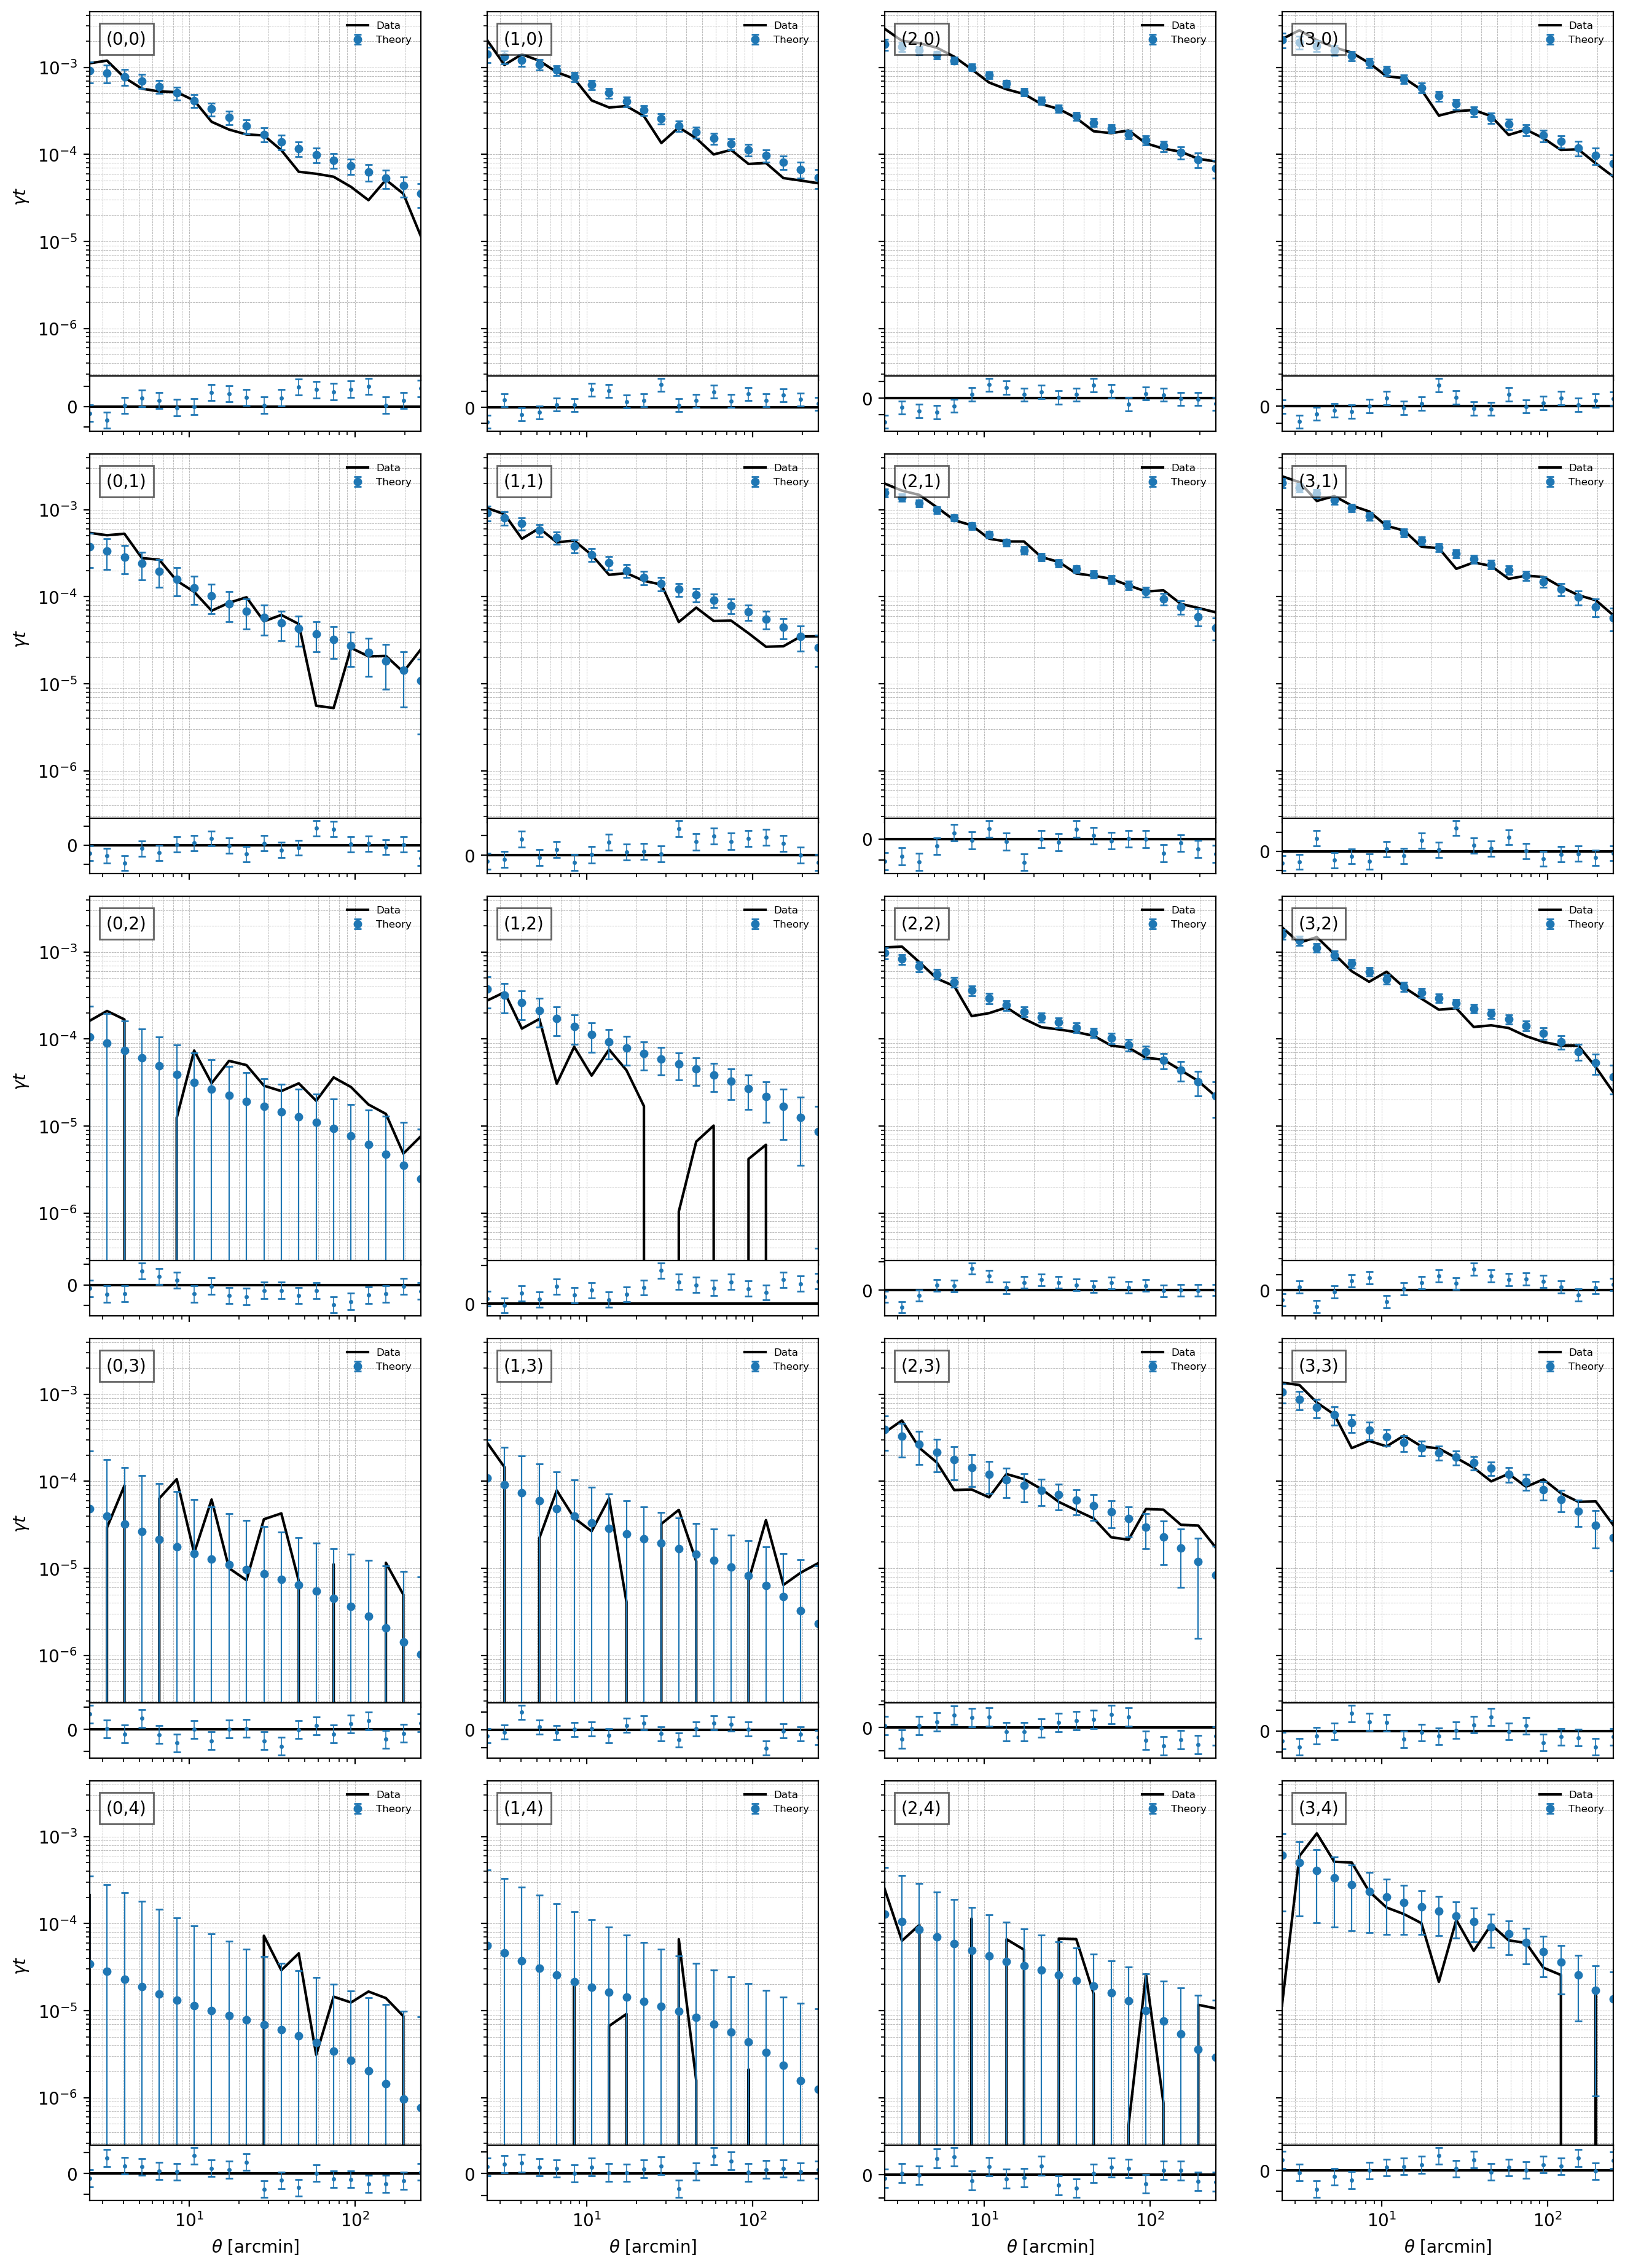

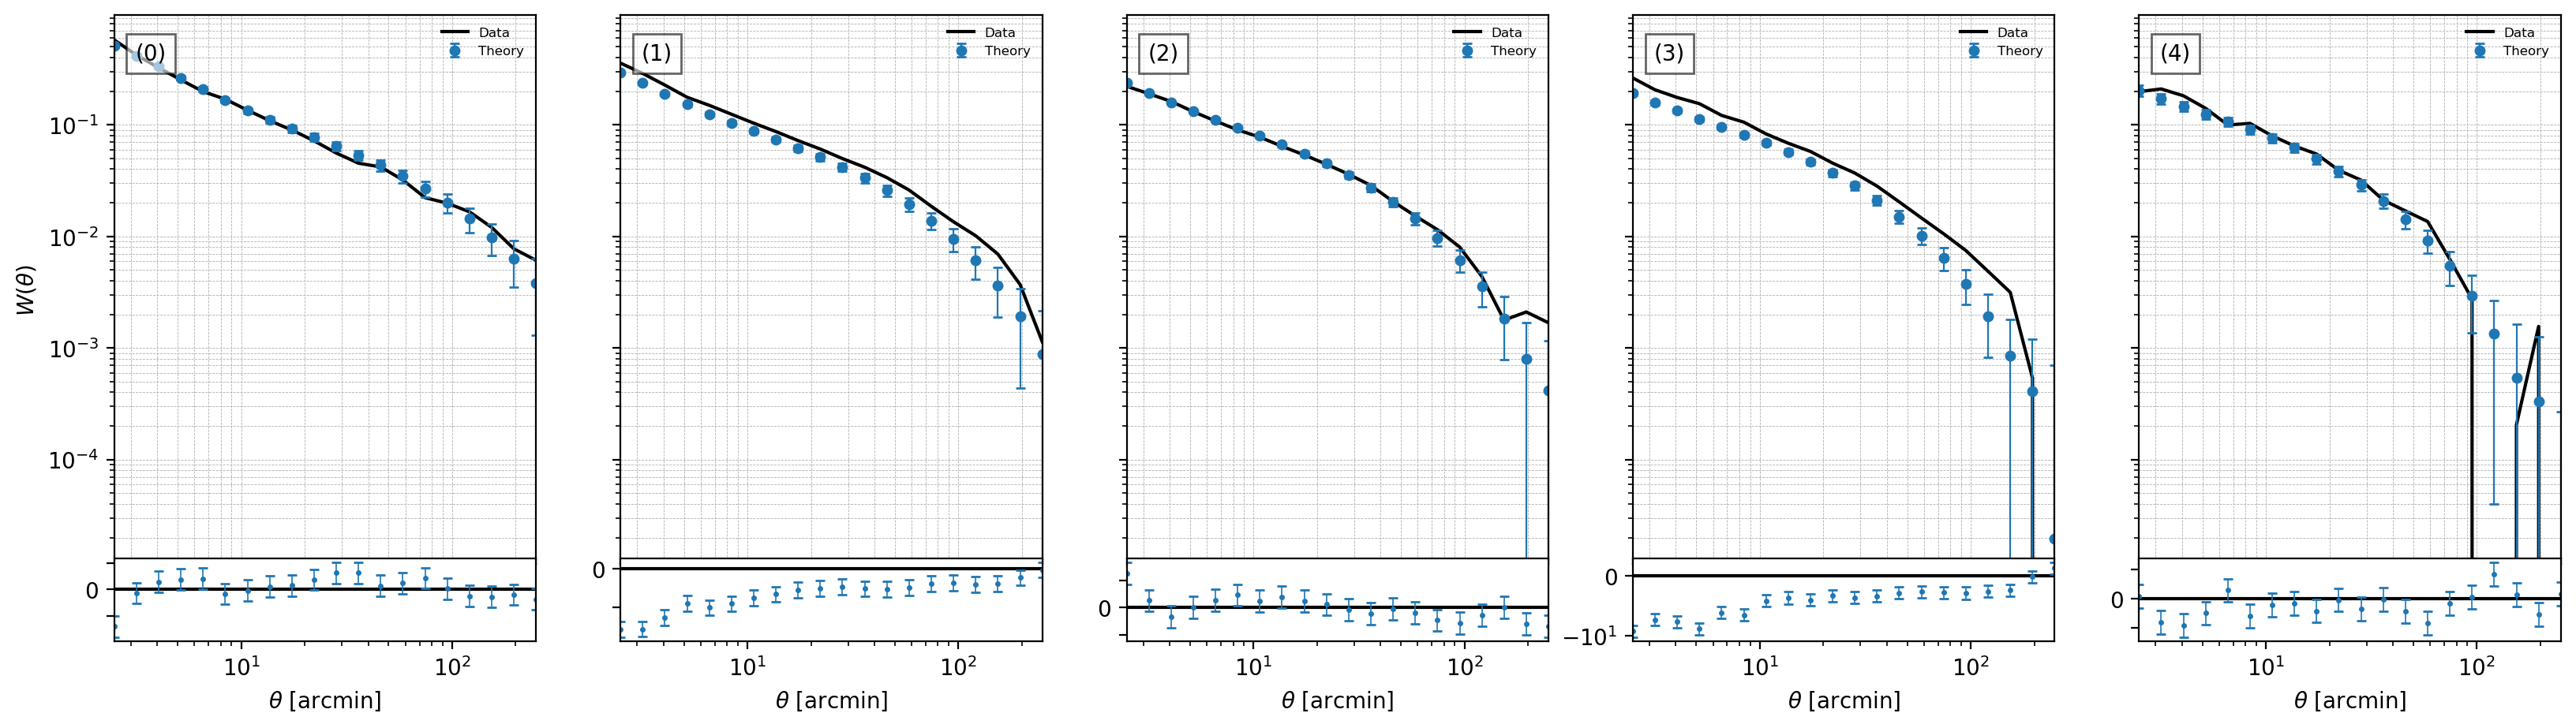

In [15]:
tot_msk = np.loadtxt('./cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.mask')
tot_msk = tot_msk[:,1]
datacov = np.loadtxt('./cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs_cov' )
cov = np.zeros((900,900))
for i in range(810000):
    cov[int(datacov[i,0]), int(datacov[i,1])] = datacov[i,2]

filepath = './firecrown/examples/des_y1_3x2pt/output_factory/data_vector/'

ntomos_srcs = 4
ntomos_lens = 5

datavector_data = np.loadtxt(filepath+'firecrown_data.txt')
datavector_theory = np.loadtxt(filepath+'firecrown_theory.txt')
theory_firecrown = datavector_theory

all_datavector_data = np.zeros_like(tot_msk)
all_datavector_theory = np.zeros_like(tot_msk)
all_datavector_data[tot_msk==1.] = datavector_data
all_datavector_theory[tot_msk==1.] = datavector_theory

#all_cov = np.zeros((len(tot_msk),len(tot_msk)))
#for idx_i, i in enumerate(np.where(msk_tot==1)[0]):
#    for idx_j, j in enumerate(np.where(msk_tot==1)[0]):
#        all_cov[i,j] = cov[idx_i, idx_j]



plot_all_observables(all_datavector_theory,
                         all_datavector_data,
                         cov,
                         ntomo_srcs=4,
                         ntomo_lens=5,
                         n_theta=20,
                         theta_min=2.5,
                         theta_max=250.0,
                         msk = tot_msk,
                         save=False)

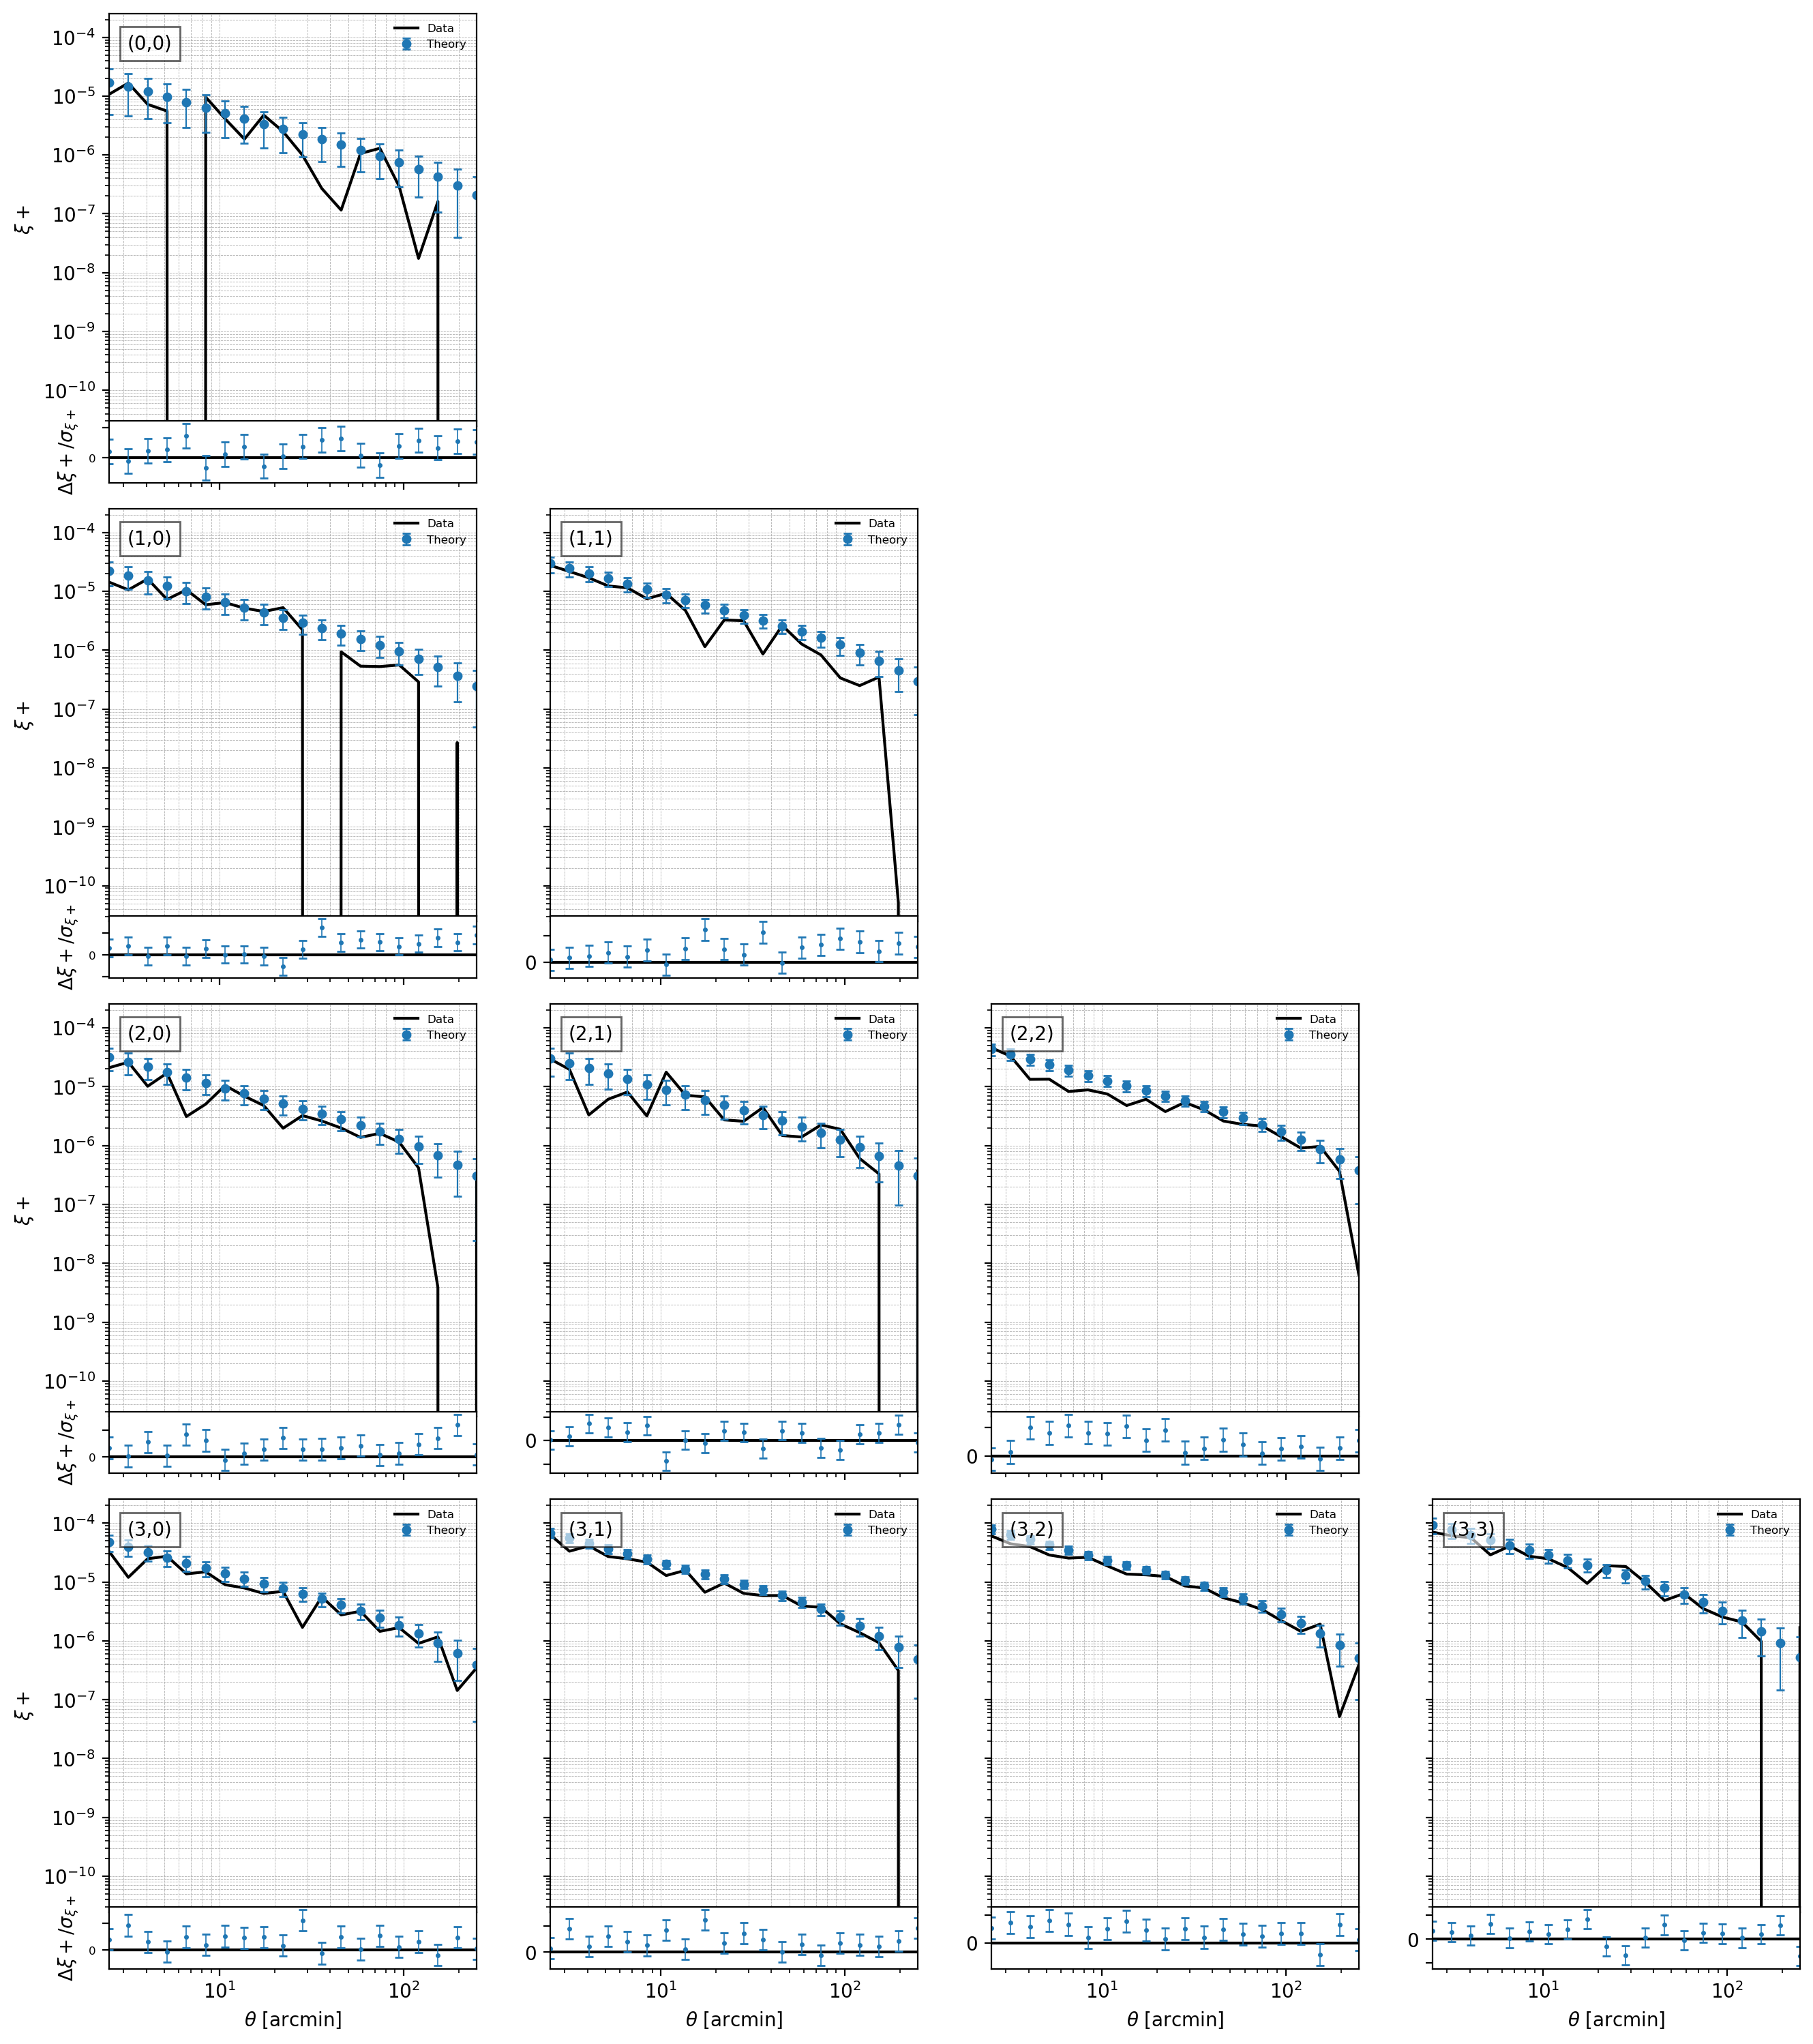

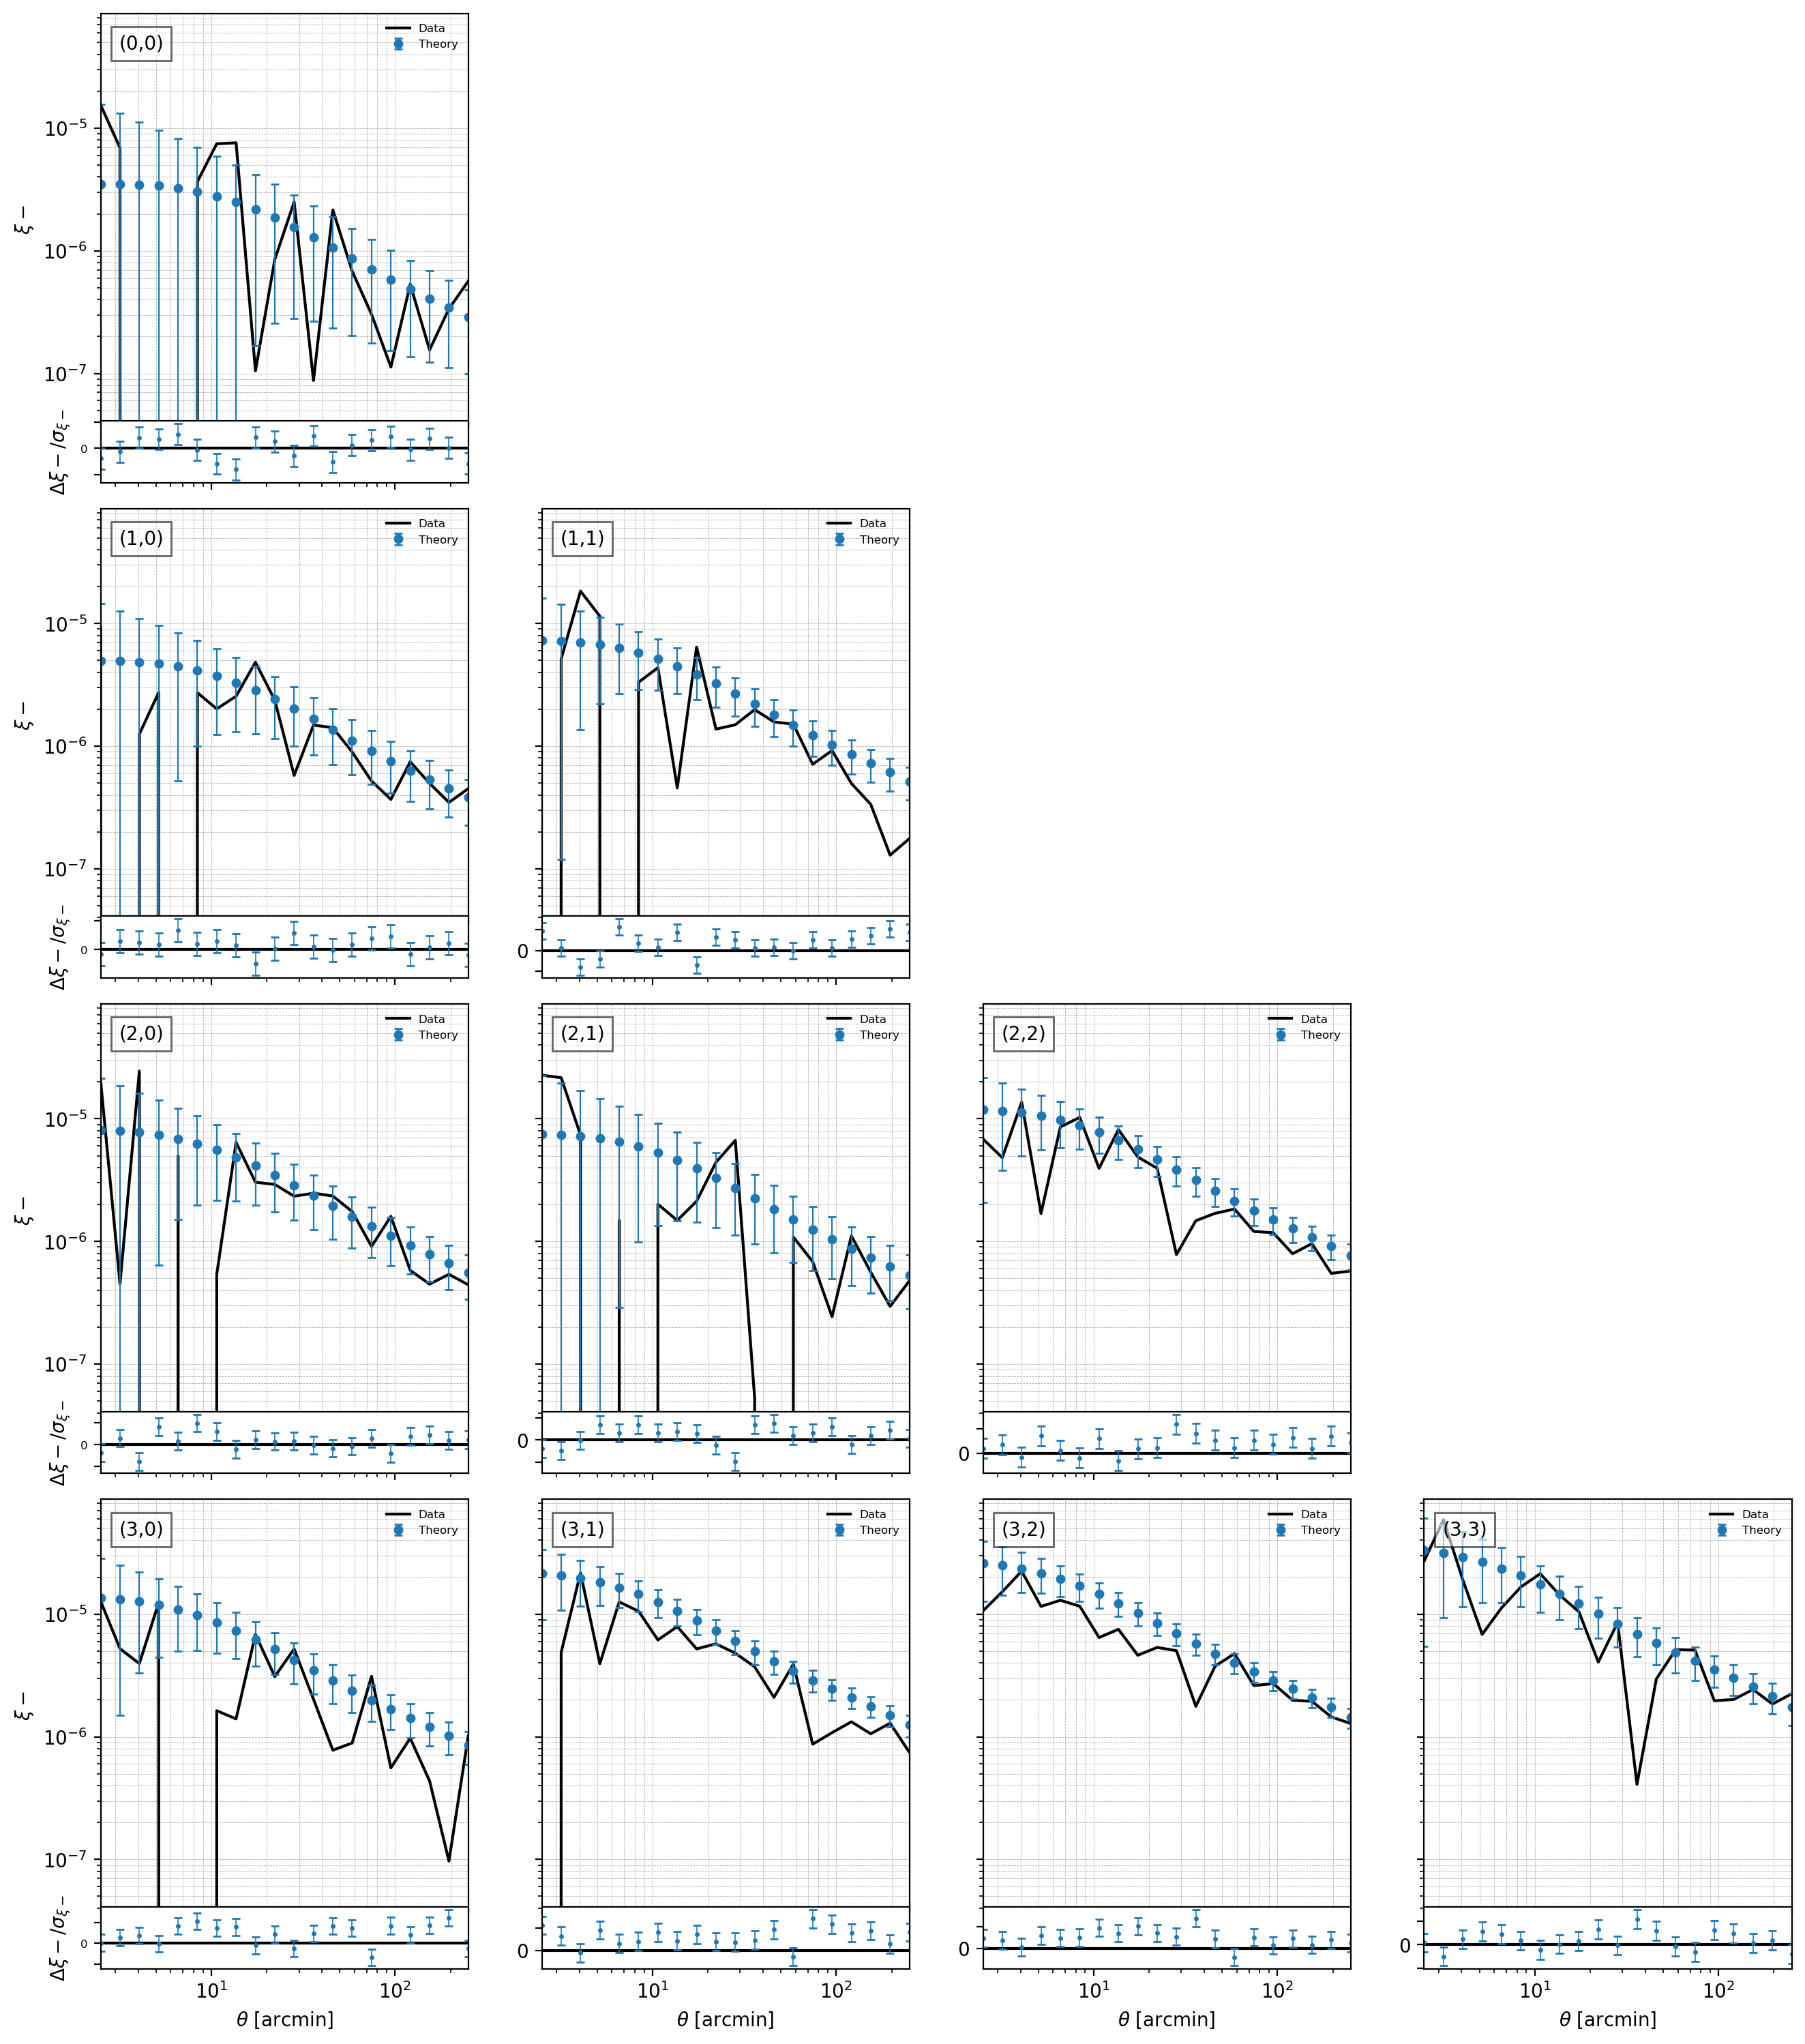

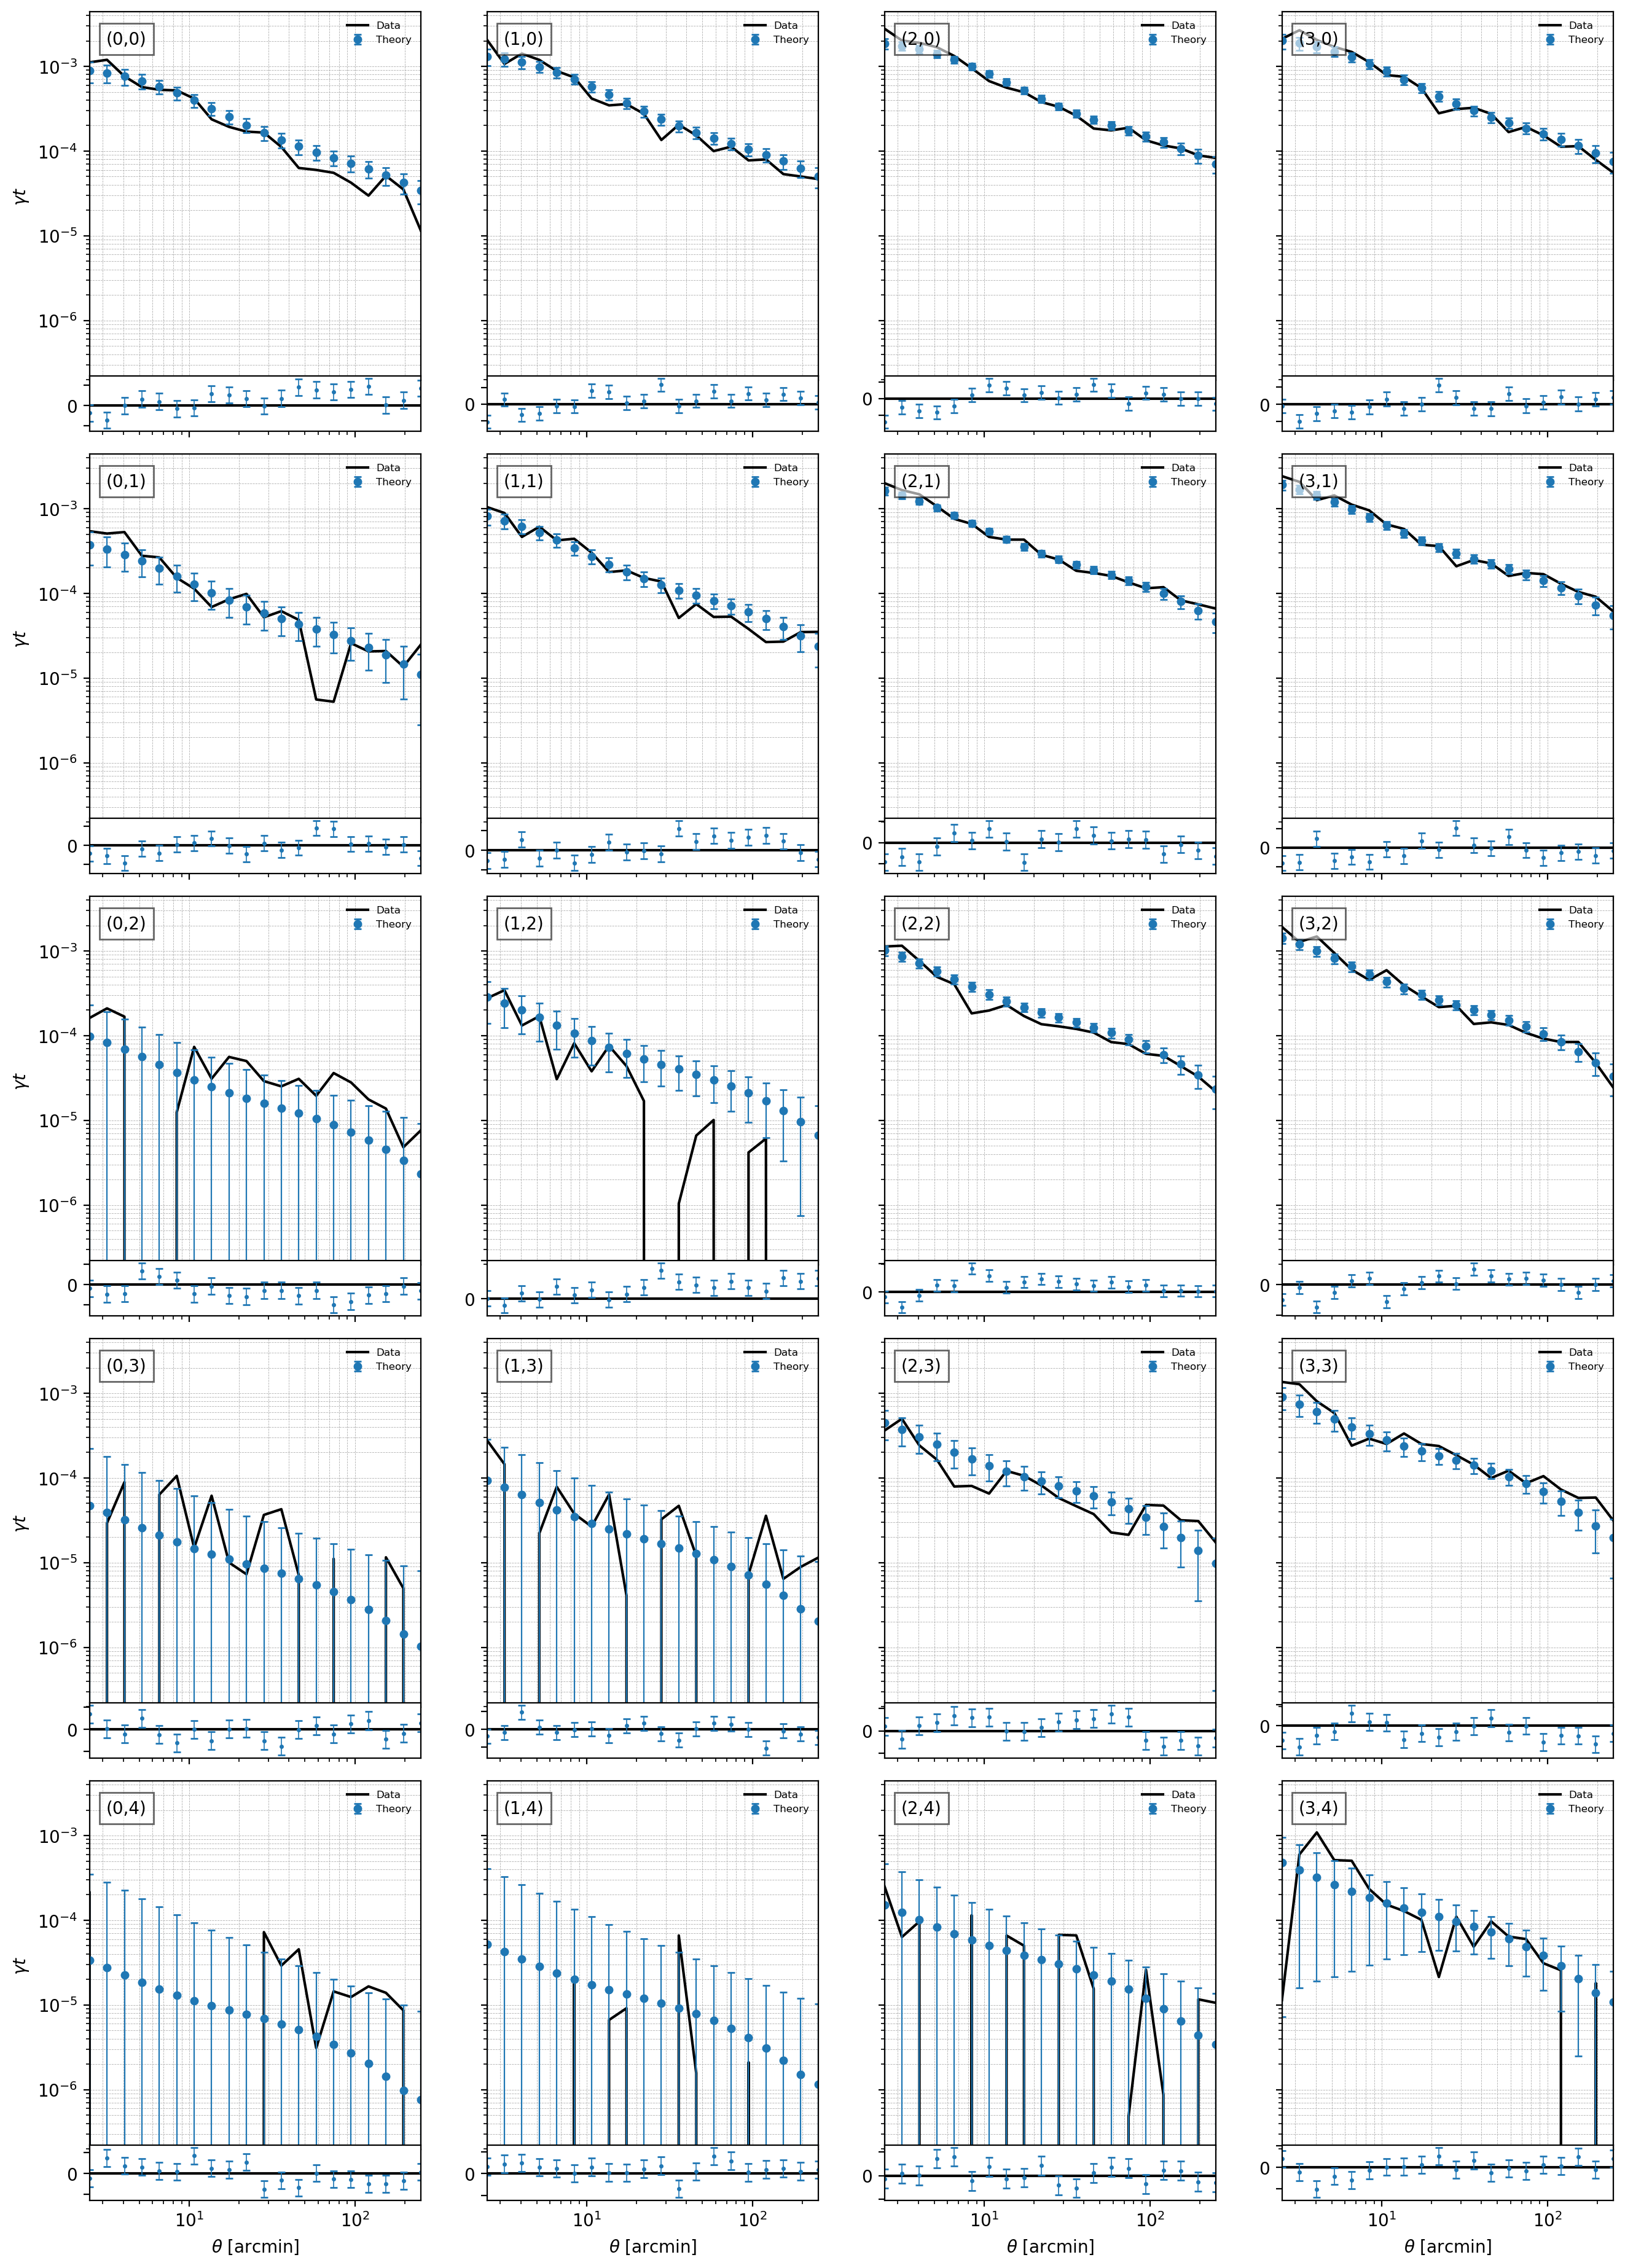

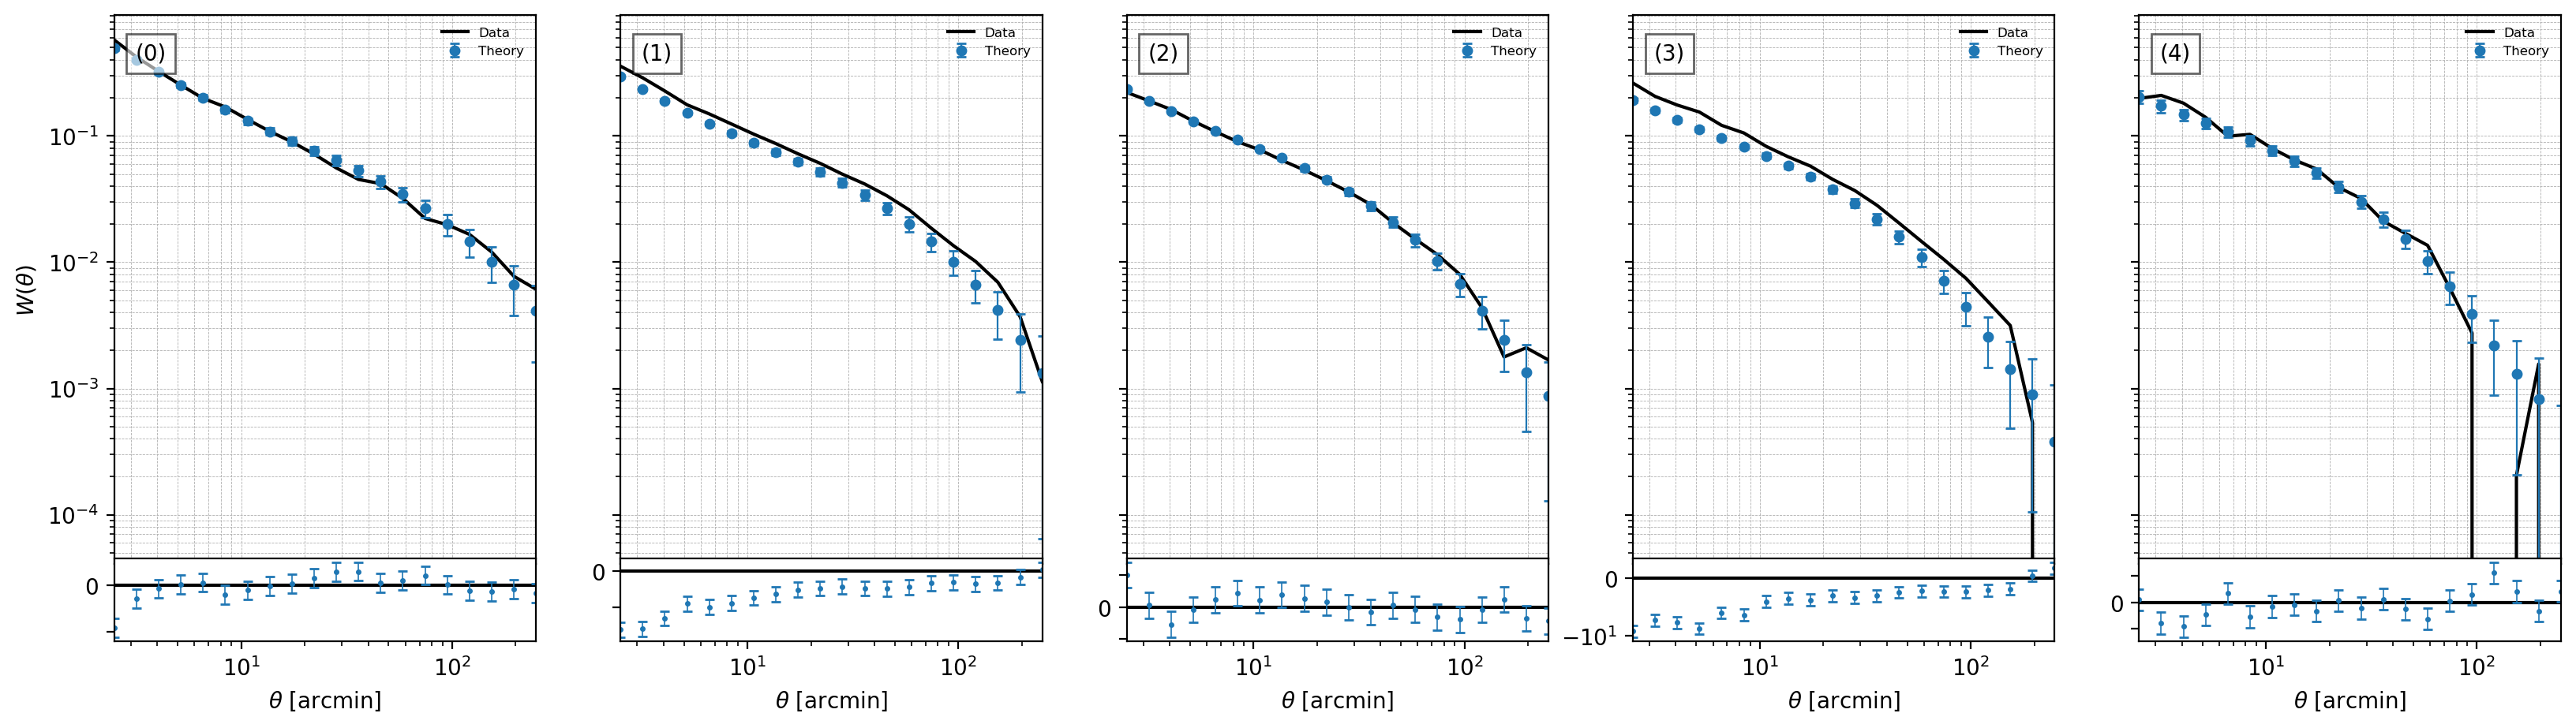

In [17]:
tot_msk = np.loadtxt('./cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.mask')
tot_msk = tot_msk[:,1]
datacov = np.loadtxt('./cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs_cov' )
cov = np.zeros((900,900))
for i in range(810000):
    cov[int(datacov[i,0]), int(datacov[i,1])] = datacov[i,2]

ntomos_srcs = 4
ntomos_lens = 5

datavector_data = np.loadtxt('./cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.datavector')[:,1]
datavector_theory = np.loadtxt('./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector')[:,1]
theory_cocoa = datavector_theory

plot_all_observables(datavector_theory,
                         datavector_data,
                         cov,
                         ntomo_srcs=4,
                         ntomo_lens=5,
                         n_theta=20,
                         theta_min=2.5,
                         theta_max=250.0,
                         msk = tot_msk,
                         save=False)

cocoa result / firecrown cosmosis result 
 used same parameters values, at least for explicit parameters 
 used same dataset des_y1 
 no mask used, however the original data is very sketchy
info:
 ntomos_srcs=4
 ntomos_lens=5 
 theta_range=(2.5,250)
 augular_bins=20


Text(0.5, 1.0, 'Cocoa / Firecrown-Cosmosis')

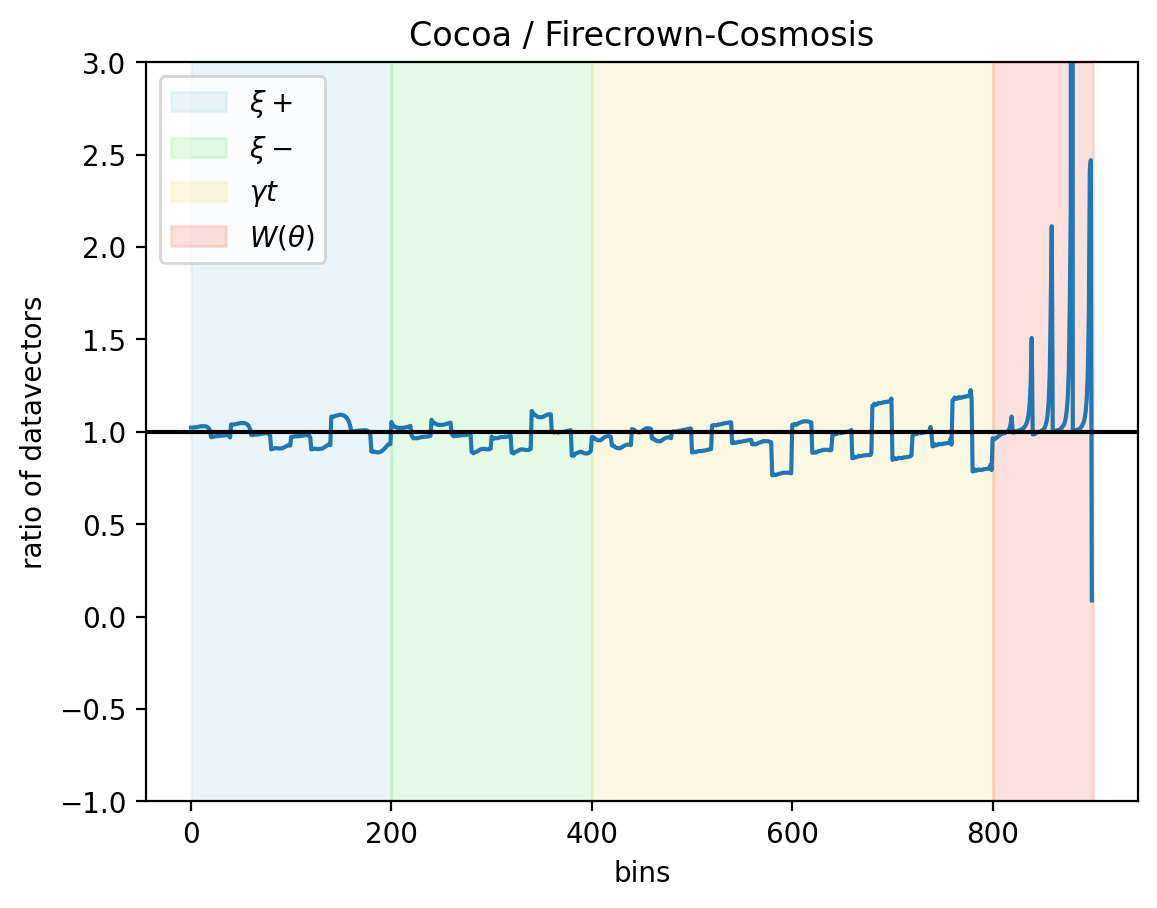

In [43]:
print('cocoa result / firecrown cosmosis result \n used same parameters values, at least for explicit parameters \n used same dataset des_y1 \n no mask used, however the original data is very sketchy')
print('info:\n ntomos_srcs=4\n ntomos_lens=5 \n theta_range=(2.5,250)\n augular_bins=20')
plt.plot((theory_cocoa/theory_firecrown))
plt.axhline(1,c='k')
plt.ylim(-1,3)
plt.ylabel('ratio of datavectors')
plt.xlabel('bins')
plt.axvspan(0,200,color='lightblue',alpha=0.25, label=r'$\xi+$')
plt.axvspan(200,400,color='lightgreen',alpha=0.25, label=r'$\xi-$')
plt.axvspan(400,800,color='khaki',alpha=0.25, label=r'$\gamma t$')
plt.axvspan(800,900,color='salmon',alpha=0.25, label=r'$W(\theta)$')



plt.legend(loc='best')
plt.title('Cocoa / Firecrown-Cosmosis')